In [1]:
import sys; sys.path.insert(0,'../')
from notebook_tools import *
%matplotlib inline

Welcome to ROOTaaS 6.06/02

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent GenerateEvents!
Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent GenerateEvents!
Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent GenerateEvents!


# load data

In [2]:
PmissBins   = [[0.3,0.45]  , [0.45,0.55] , [0.55,0.65]  , [0.65,0.75] , [0.75,1.0]]

cm_pars = dict()
ana_data = dict()
for target in ['C12','Al27','Fe56','Pb208']:
    cm_pars[target] = pd.read_csv( "/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/DATA/%s_dataCMparameters.csv"%target ) 
    ana_data[target] = TAnalysisEG2( "/Users/erezcohen/Desktop/DataMining/AnaFiles" ,  "Ana_ppSRCCut_DATA_%s"%target )

## older

In [1]:
                  #,                  pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs_0_2000_simulationruns_results.csv')])
# sims = pd.concat([pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/results_89813runs.csv'),
#                   pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/results_238401runs.csv'),
#                  pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/results_14054runs.csv')])
# sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/results_18208runs.csv')

## 5 Pmiss Bins

sims = pd.concat([pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs_0_1000_simulationruns_results.csv')
                 ,pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/results_239590runs.csv')
                 ])
print len(sims),'runs in the sample'

## 3 Pmiss Bins

sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs_0_5000_simulationruns_results.csv')
print len(sims),'runs in the sample'

## 1 Pmiss Bins in transverse directions and 5 in longitudinal

In [167]:
sims = pd.concat([
                  pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs_0_5000_simulationruns_results.csv')
#                   ,pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/SinglePmissBinTransverse_results_85356runs.csv')
                  ])
print len(sims),'runs in the sample'

1969 runs in the sample


In [168]:
# sims=sims[sims['parameters_reconstructed_well']==True]
sims=sims[sims['parameters_reconstructed_well']!='0']
sims.fillna(0.0,inplace=True)
print len(sims),'runs in the sample'
print len(sims[sims['ks_PvalTotal_C12']>0]),'events with ks_PvalTotal_C12>0'
print len(sims[sims['ks_PvalTotal_Al27']>0]),'events with ks_PvalTotal_Al27>0'
print len(sims[sims['ks_PvalTotal_Fe56']>0]),'events with ks_PvalTotal_Fe56>0'
print len(sims[sims['ks_PvalTotal_Pb208']>0]),'events with ks_PvalTotal_Pb208>0'


1966 runs in the sample
38 events with ks_PvalTotal_C12>0
269 events with ks_PvalTotal_Al27>0
47 events with ks_PvalTotal_Fe56>0
760 events with ks_PvalTotal_Pb208>0


In [170]:
sample = sims[sims['ks_PvalTotal_C12']>0]
# sample = sims[sims['gen_b2']>0.3]

sample[['run','ks_PvalTotal_C12','gen_SigmaX','gen_a1','gen_a2','gen_b1'
                                  ,'EvtsInBin_bin0','ks_local_Pval_pcmZ_bin0_C12'
                                   ,'EvtsInBin_bin1','ks_local_Pval_pcmZ_bin1_C12'
                                   ,'EvtsInBin_bin2','ks_local_Pval_pcmZ_bin2_C12'
                                   ,'EvtsInBin_bin3','ks_local_Pval_pcmZ_bin3_C12'
                                   ,'EvtsInBin_bin4','ks_local_Pval_pcmZ_bin4_C12'
#                                             ,'recmean_x_bin0','recsigma_x_bin0'
#                                             ,'ks_local_Pval_pcmX_bin0_C12'
#                                             ,'recmean_x_bin1','recsigma_x_bin1'
#                                             ,'ks_local_Pval_pcmX_bin1_C12'
#                                             ,'recmean_x_bin2','recsigma_x_bin2'
#                                             ,'ks_local_Pval_pcmX_bin2_C12'
#                                             ,'recmean_x_bin3','recsigma_x_bin3'
#                                             ,'ks_local_Pval_pcmX_bin3_C12'
#                                             ,'recmean_x_bin4','recsigma_x_bin4'
#                                             ,'ks_local_Pval_pcmX_bin4_C12' 
#                                             ,'ks_local_Pval_pcmY_bin0_C12','ks_local_Pval_pcmY_bin1_C12','ks_local_Pval_pcmY_bin2_C12','ks_local_Pval_pcmY_bin3_C12','ks_local_Pval_pcmY_bin4_C12' 
                                            
                                           ]]

run  ks_PvalTotal_C12  gen_SigmaX    gen_a1    gen_a2    gen_b1  \
97     127          0.000120    0.139922  0.587632  0.199392  0.939378   
137    178          0.000476    0.130582  0.398190  0.233951  0.044514   
148    195          0.000002    0.129144  0.472682  0.325543  0.491286   
214    288          0.000001    0.123131 -0.031745  0.166262  0.442452   
260    359          0.000006    0.187471  0.502156  0.239351  1.057405   
320    437          0.000001    0.176124  0.745902  0.382277  0.434849   
482    667          0.002409    0.137207  0.371596  0.277503  1.060435   
510    700          0.000065    0.147257  0.466686  0.201422  0.576602   
589    804          0.000010    0.132471  0.154517  0.200644 -0.086482   
623    855          0.000003    0.132888  0.723389  0.281590  0.868662   
650    897          0.000001    0.151442  0.552300  0.218212  0.660677   
792   1075          0.000006    0.159783  0.699851  0.283800  0.713196   
832   1125          0.000529    0.135856  0.109134  0.186840  0.580558   
834   1128          0.001168    0.150996  0.485718  0.231423  0.855666   
852   1152          0.000001    0.172973  0.724424  0.359358  0.969907   
920   1244          0.000009    0.155780  0.743567  0.234302  1.196629   
961   1301          0.000002    0.140766  0.065610  0.229075  0.534673   
1033  1400          0.000002    0.127902  0.085237  0.261903  0.679358   
1037  1406          0.000046    0.116571  0.241174  0.294219  0.648717   
1128  1523          0.000002    0.114620  0.296204  0.237887  1.163238   
1171  1578          0.000001    0.141663  0.051042  0.282357  0.257652   
1185  1594          0.000164    0.170195  0.946720  0.309084  0.800445   
1200  1613          0.000001    0.123789  0.829135  0.332393  0.975999   
1227  1651          0.000001    0.130721  0.339688  0.334360  0.530796   
1322  1770          0.000019    0.157899  0.916468  0.431806  0.576824   
1365  1825          0.000015    0.165789  0.439502  0.255907  0.415459   
1425  1912          0.000011    0.135100  0.895362  0.323325  0.413685   
1682  2262          0.000006    0.199867  0.564352  0.209272  0.745558   
1700  2284          0.000002    0.131204 -0.029262  0.137916  0.042632   
1715  2299          0.000001    0.140072 -0.065477  0.320839  0.398139   
1728  2318          0.000003    0.134935  0.289203  0.307288  0.462562   
1778  2389          0.000258    0.122624  0.682586  0.250325  0.974543   
1811  2435          0.000005    0.133421  0.780592  0.297245  0.948868   
1863  2505          0.000005    0.124358  0.613265  0.305816  0.589607   
1901  2558          0.000014    0.184483  0.488048  0.269365  0.627910   
1918  2583          0.000002    0.173776  0.304404  0.252887  0.655003   
1944  2619          0.000020    0.192665  0.189395  0.143906  0.836837   
1953  2631          0.000005    0.121306  0.468516  0.257507  0.346771   

      EvtsInBin_bin0  ks_local_Pval_pcmZ_bin0_C12  EvtsInBin_bin1  \
97              77.0                     0.063486           143.0   
137             72.0                     0.109913           143.0   
148             71.0                     0.000711           151.0   
214             71.0                     0.000412           143.0   
260             71.0                     0.272486           146.0   
320             74.0                     0.104783           145.0   
482             72.0                     0.018050           146.0   
510             76.0                     0.268028           146.0   
589             72.0                     0.566590           143.0   
623             71.0                     0.003822           145.0   
650             71.0                     0.466735           146.0   
792             72.0                     0.119729           149.0   
832             71.0                     0.038633           152.0   
834             74.0                     0.297577           145.0   
852             74.0                     0.002533           147.0   
920             

## sigma_t

In [122]:
print np.average(sims.gen_SigmaX - sims.recSigmaX , weights=sims.ks_PvalTotal_C12)
print np.average(sims.gen_SigmaY - sims.recSigmaY , weights=sims.ks_PvalTotal_C12)

-0.0212949882854
-0.0211703343983


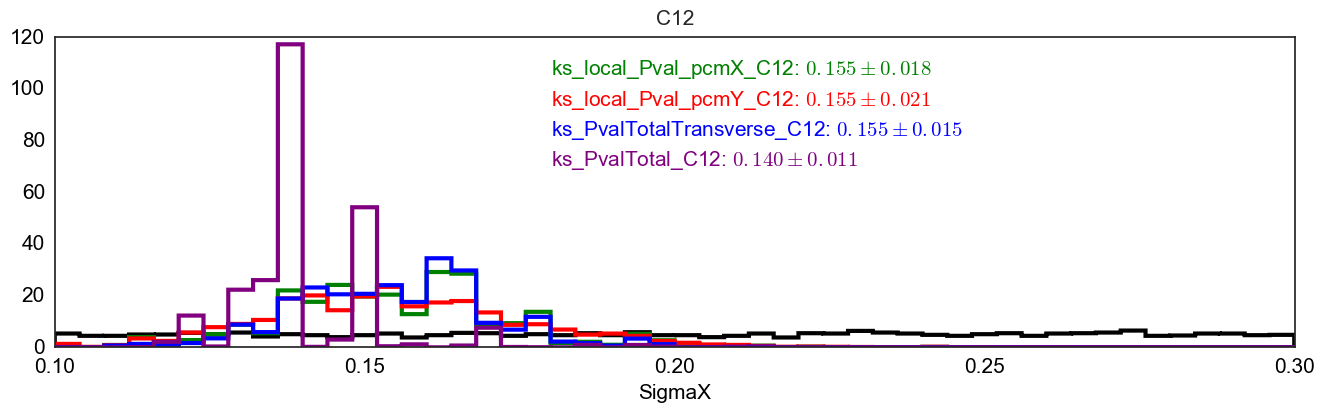

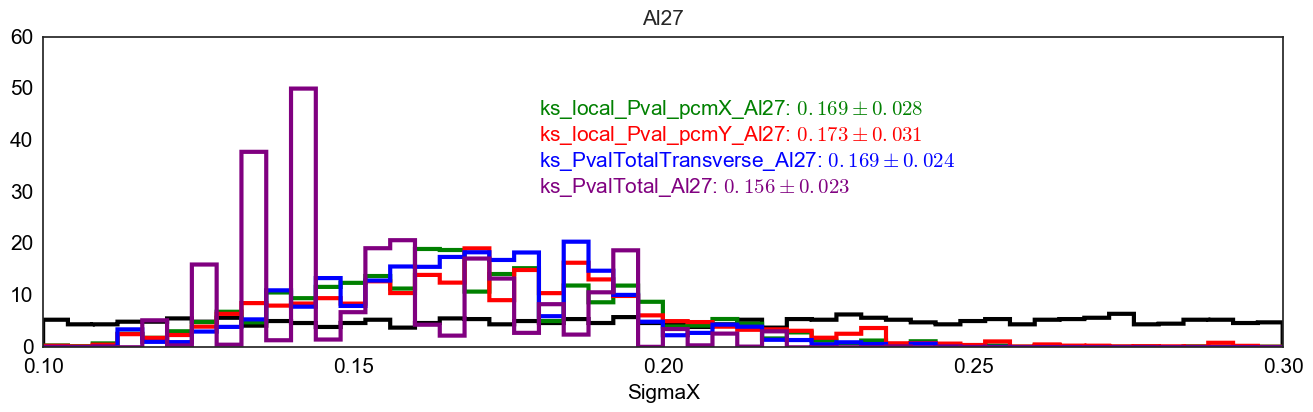

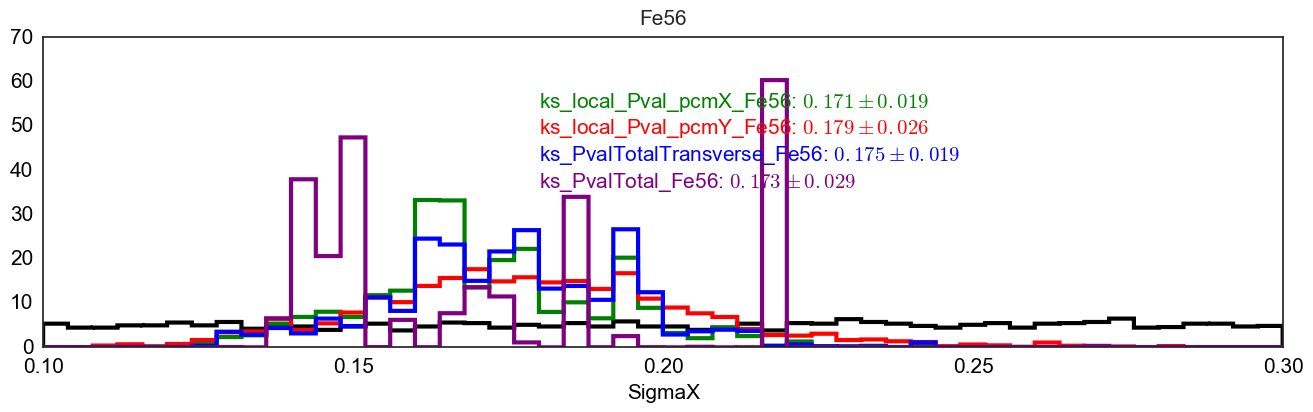

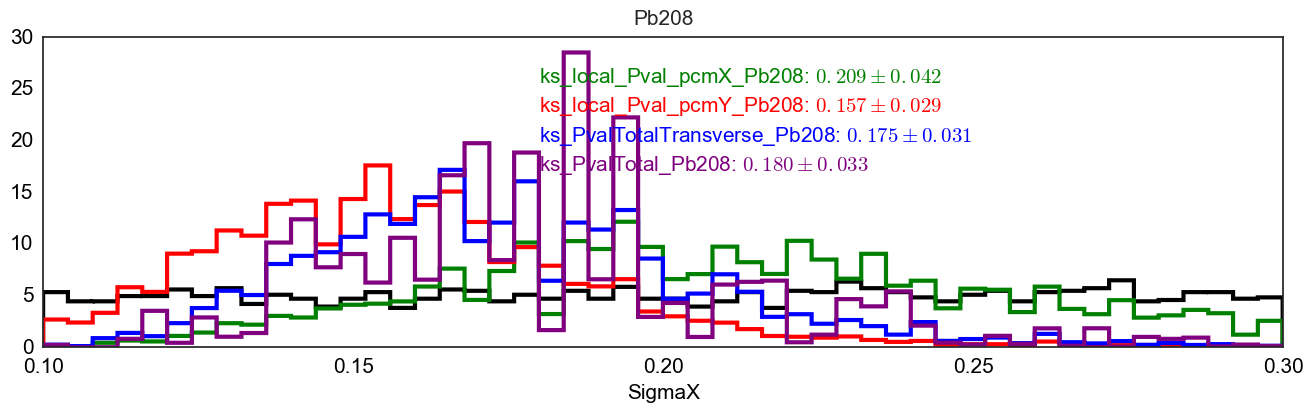

In [171]:
sample = sims
for target in ['C12','Al27','Fe56','Pb208']:    
    fig,ax = plt.subplots(figsize=(16,4))
    parameter = 'SigmaX'
    x = sample['gen_'+parameter] 
#     x = sample['rec'+parameter] 
    h,bins,_=plt.hist(x,bins=50,normed=1,histtype='step',linewidth=3,color='black')
    weights_array = ['ks_local_Pval_pcmX_'+target,'ks_local_Pval_pcmY_'+target,'ks_PvalTotalTransverse_'+target,'ks_PvalTotal_'+target]
    #,'ks_local_Pval_pcmX_bin3_'+target,'ks_local_Pval_pcmX_bin4_'+target
    
    colors = ['green','red','blue','purple','salmon','black','cyan','yellow']
    y_max,mu,sigma=0,[],[]
    for i,weights_name,color in zip(range(len(weights_array)),weights_array,colors):
        weights = sample[weights_name]
        if np.sum(weights)>0:
            h,bins,_=plt.hist(x,weights=weights,bins=bins,normed=1,histtype='step',linewidth=3,color=color);
            if np.max(h)>y_max: y_max=np.max(h)
            mu.append(np.average(x , weights=weights))
            sigma.append(np.sqrt(np.average((x-mu[-1])**2, weights=weights)))
    for i,weights_name,color in zip(range(len(mu)),weights_array,colors):
        plt.text(np.min(bins)+0.4*(np.max(bins)-np.min(bins)),(1-0.1*(i+1))*y_max,weights_name+': $%.3f\\pm%.3f$'%(mu[i],sigma[i]),fontsize=15,color=color)

    set_axes(ax,x_label=parameter,fontsize=15)
    ax.set_title(target,fontsize=15,y=1.02)    

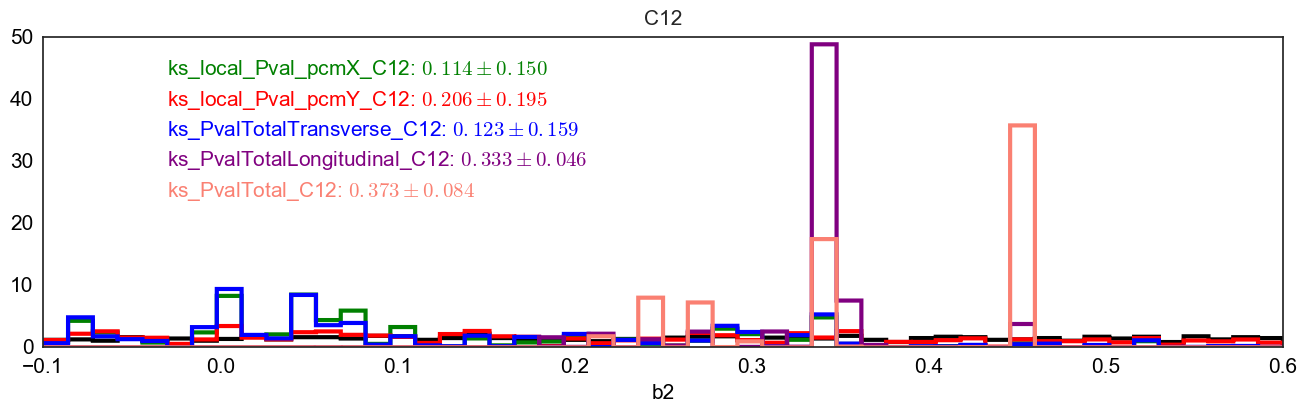

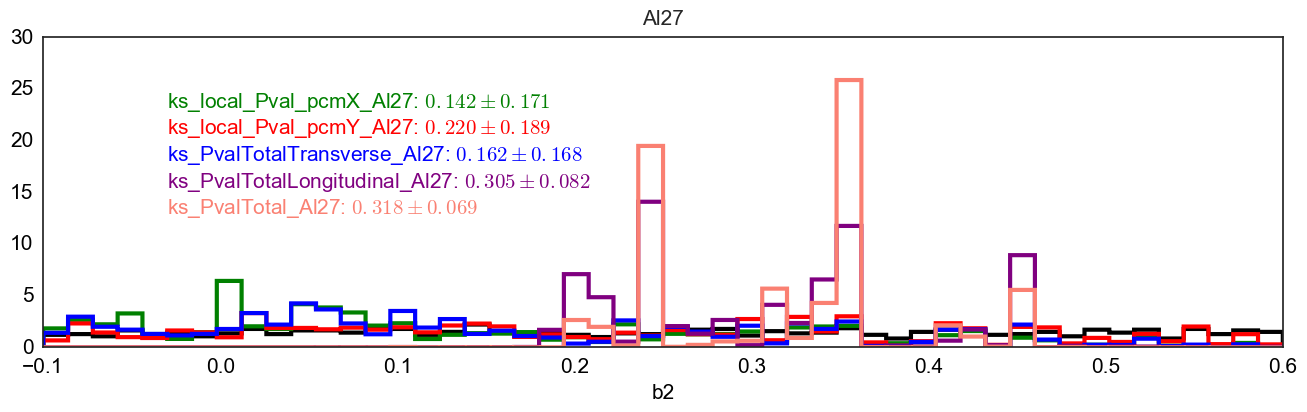

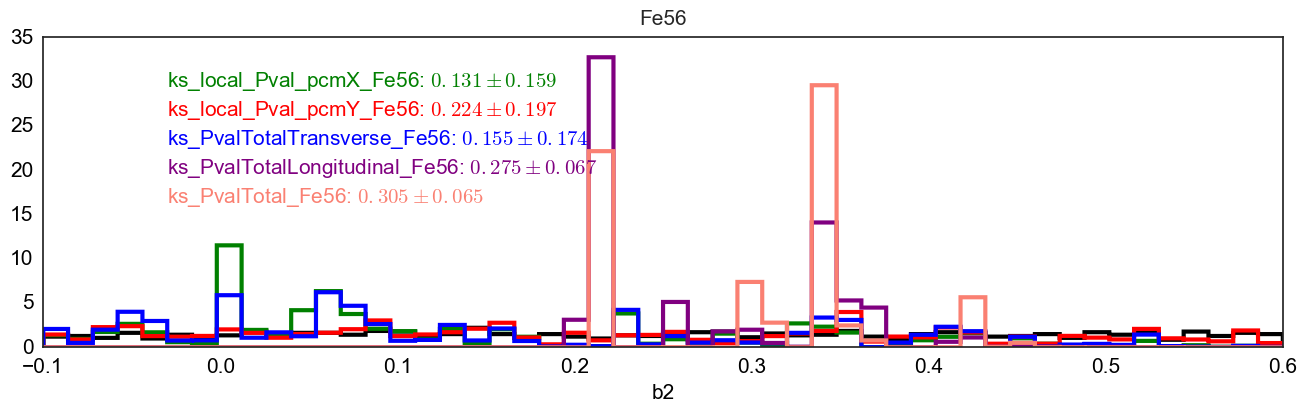

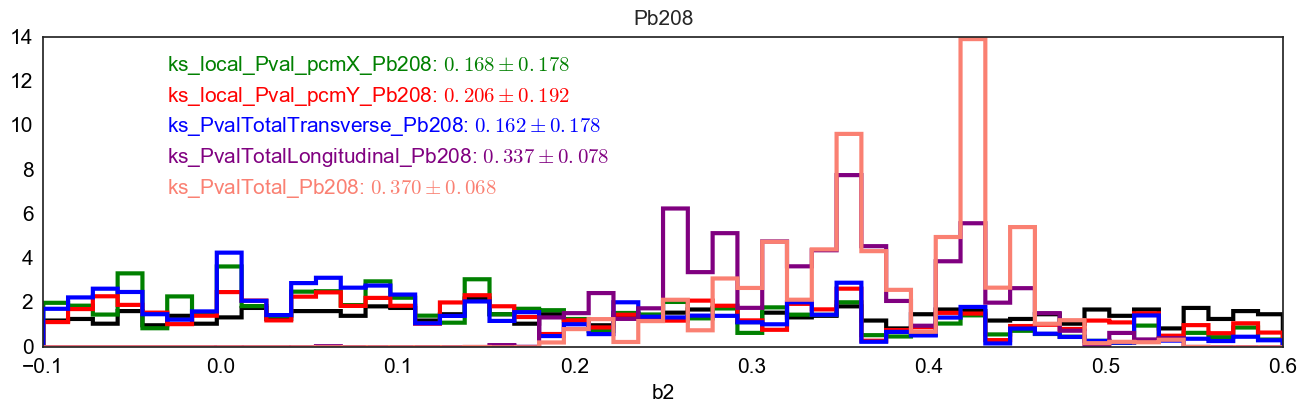

In [147]:
sample = sims
for target in ['C12','Al27','Fe56','Pb208']:    
    fig,ax = plt.subplots(figsize=(16,4))
    parameter = 'b2'
    x = sample['gen_'+parameter]
    h,bins,_=plt.hist(x,bins=50,normed=1,histtype='step',linewidth=3,color='black')
    weights_array = ['ks_local_Pval_pcmX_'+target,'ks_local_Pval_pcmY_'+target,'ks_PvalTotalTransverse_'+target,'ks_PvalTotalLongitudinal_'+target,'ks_PvalTotal_'+target]    
    colors = ['green','red','blue','purple','salmon','black','cyan','yellow']
    y_max,mu,sigma=0,[],[]
    for i,weights_name,color in zip(range(len(weights_array)),weights_array,colors):
        weights = sample[weights_name]
        if np.sum(weights)>0:
            h,bins,_=plt.hist(x,weights=weights,bins=bins,normed=1,histtype='step',linewidth=3,color=color);
            if np.max(h)>y_max: y_max=np.max(h)
            mu.append(np.average(x , weights=weights))
            sigma.append(np.sqrt(np.average((x-mu[-1])**2, weights=weights)))
    for i,weights_name,color in zip(range(len(mu)),weights_array,colors):
        plt.text(np.min(bins)+0.1*(np.max(bins)-np.min(bins)),(1-0.1*(i+1))*y_max,weights_name+': $%.3f\\pm%.3f$'%(mu[i],sigma[i]),fontsize=15,color=color)

    set_axes(ax,x_label=parameter,fontsize=15)
    ax.set_title(target,fontsize=15,y=1.02)    

In [215]:
cm_pars['C12']

EvtsInBin good_bin  mean_tErr_unweighted  mean_tErr_weighted  \
0         71     True              0.014444            0.014444   
1        143     True              0.008821            0.008899   
2        132     True              0.010388            0.010194   
3         96     True              0.011044            0.011028   
4         56     True              0.014849            0.015344   

   mean_t_unweighted  mean_t_weighted  mean_xErr_unweighted  \
0           0.203972         0.203972              0.020623   
1           0.191048         0.192069              0.012318   
2           0.226333         0.223975              0.015259   
3           0.197337         0.195628              0.016787   
4           0.231434         0.232065              0.022118   

   mean_xErr_weighted  mean_x_unweighted  mean_x_weighted        ...         \
0            0.020623          -0.005411        -0.005411        ...          
1            0.012456          -0.037495        -0.036376        ...          
2            0.015279          -0.012516        -0.010800        ...          
3            0.016942          -0.008092        -0.008941        ...          
4            0.022452          -0.025600        -0.027392        ...          

   sigma_x_unweighted  sigma_x_weighted  sigma_yErr_unweighted  \
0            0.173788          0.173788               0.013391   
1            0.147308          0.147911               0.009184   
2            0.175321          0.174892               0.011434   
3            0.164495          0.165145               0.011060   
4            0.165535          0.165006               0.018321   

   sigma_yErr_weighted  sigma_y_unweighted  sigma_y_weighted  \
0             0.013391            0.159660          0.159660   
1             0.009313            0.155351          0.156437   
2             0.011226            0.185864          0.181792   
3             0.010877            0.153227          0.149889   
4             0.018837            0.194256          0.195978   

   sigma_zErr_unweighted  sigma_zErr_weighted  sigma_z_unweighted  \
0               0.012941             0.012941            0.154164   
1               0.007859             0.007951            0.132934   
2               0.009643             0.009687            0.156736   
3               0.012114             0.012219            0.167935   
4               0.022976             0.023555            0.240952   

   sigma_z_weighted  
0          0.154164  
1          0.133533  
2          0.156849  
3          0.168496  
4          0.243135  

[5 rows x 36 columns]

In [18]:
f1 = ROOT.TFile('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/DATA/SRC_e1_C.root' )
p1 = f1.Get('T')
f2 = ROOT.TFile('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/DATA/SRC_e2_C.root' )
p2 = f2.Get('T')
# p2 = TPlots(path + '/DATA/SRC_e2_C.root' , 'T')
evtsgen_PmissBins = []
for i in range(5):
    pmin , pmax = PmissBins[i][0] , PmissBins[i][1]
    p_cut = ("%f<Pmiss_size && Pmiss_size<%f"%(pmin , pmax))
    evtsgen_PmissBins.append( 20. * (p1.GetEntries(p_cut) + p2.GetEntries(p_cut)) )
    print evtsgen_PmissBins[-1]

93540.0
49820.0
31620.0
15200.0
9160.0


0.0438877851016


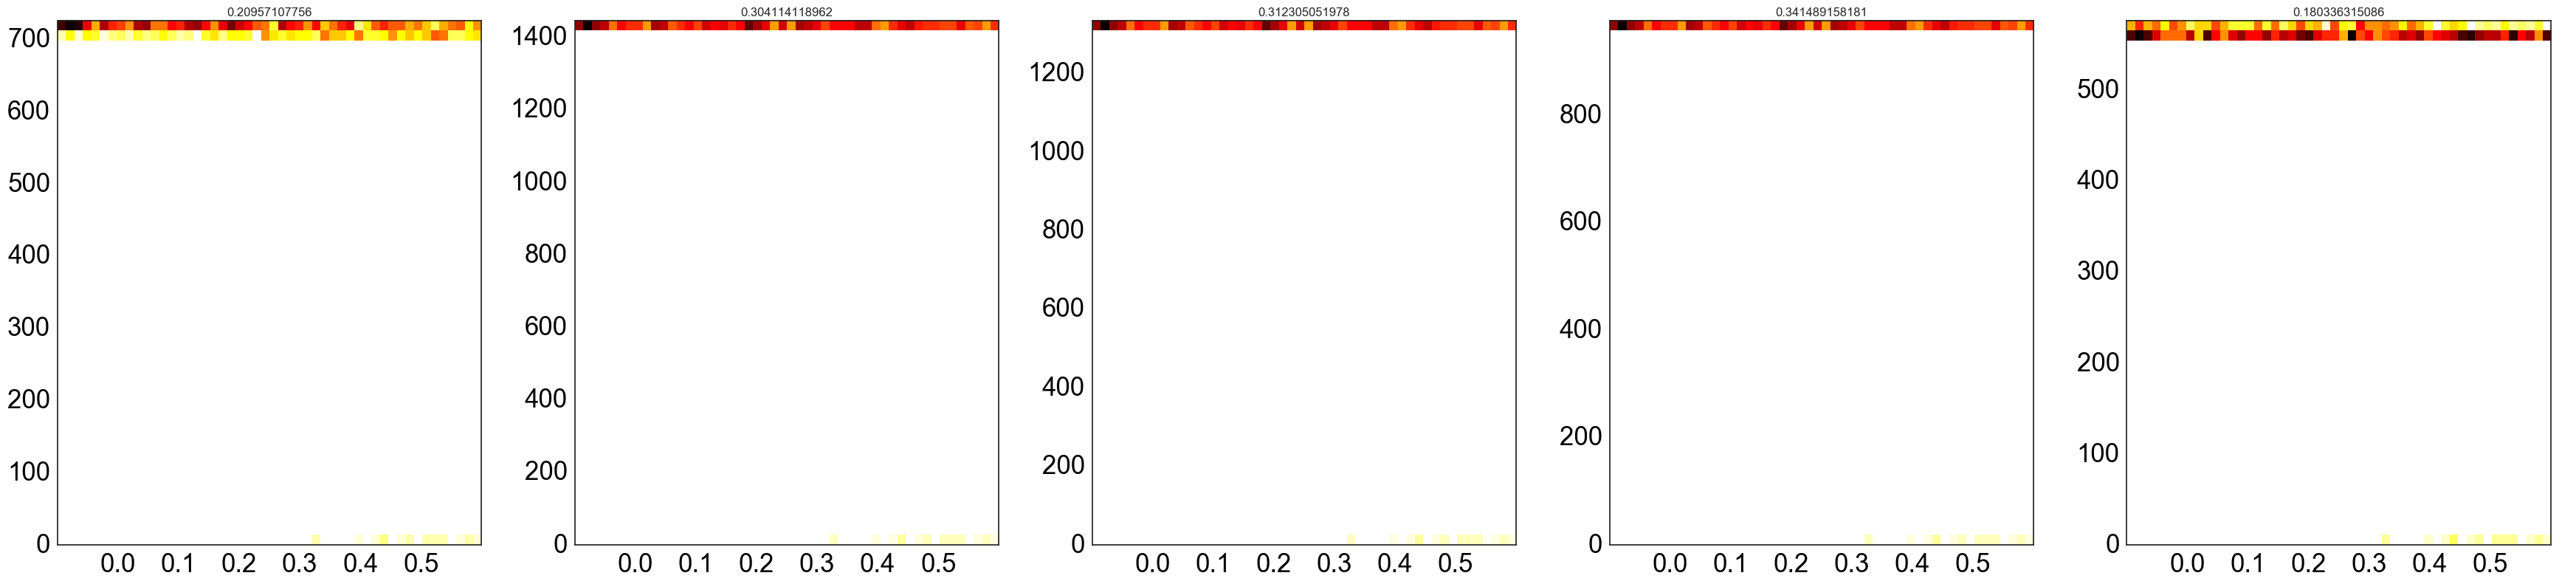

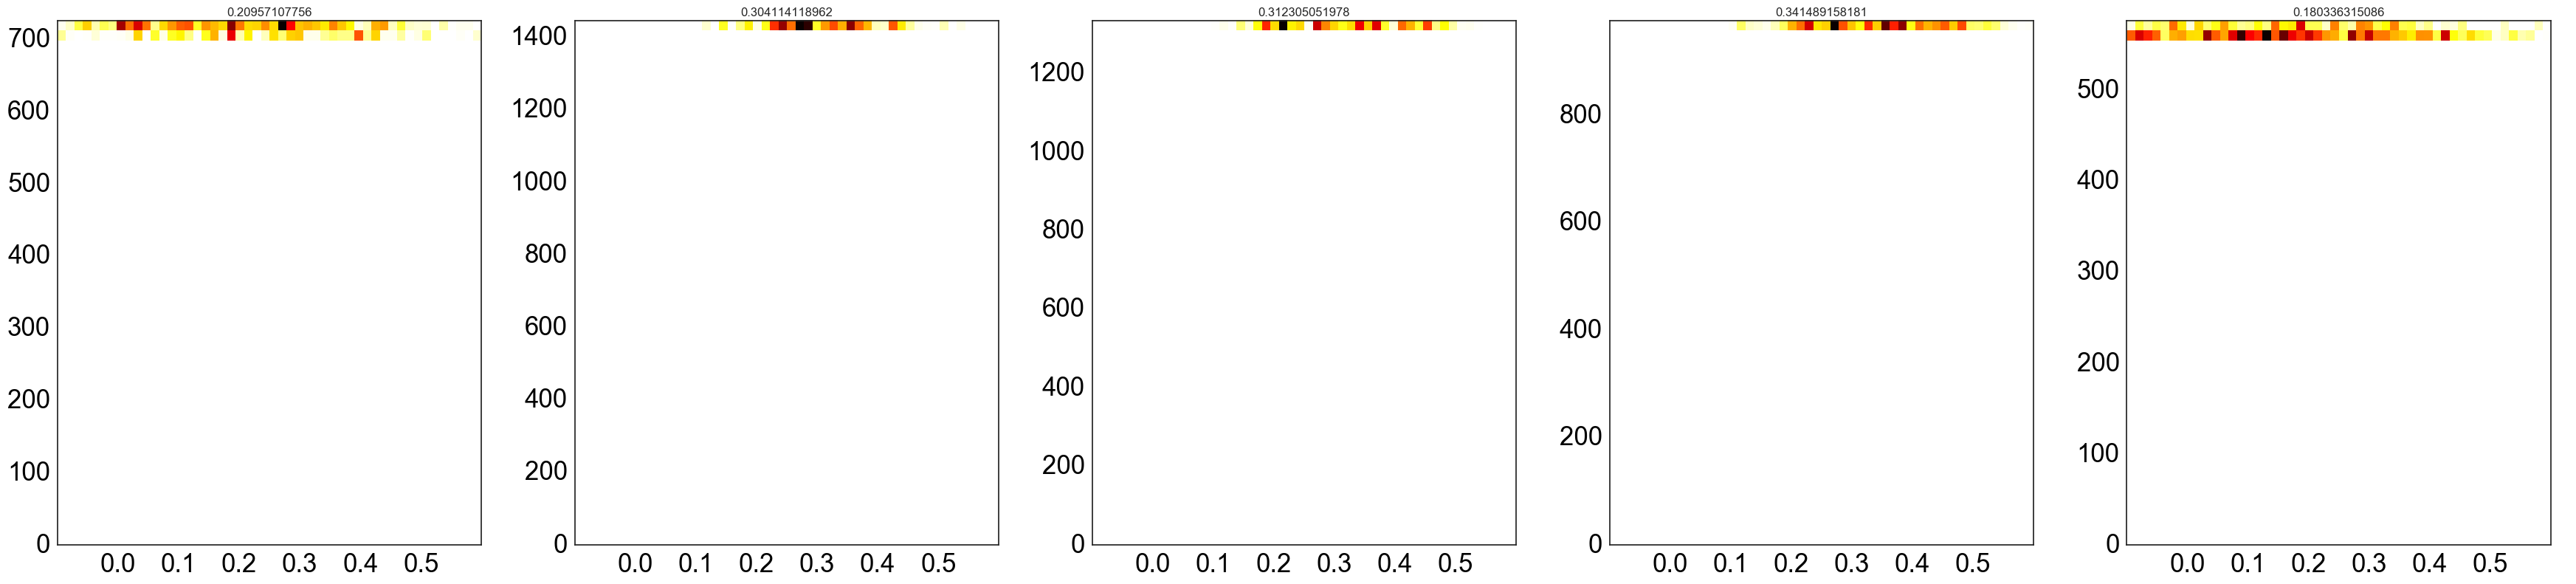

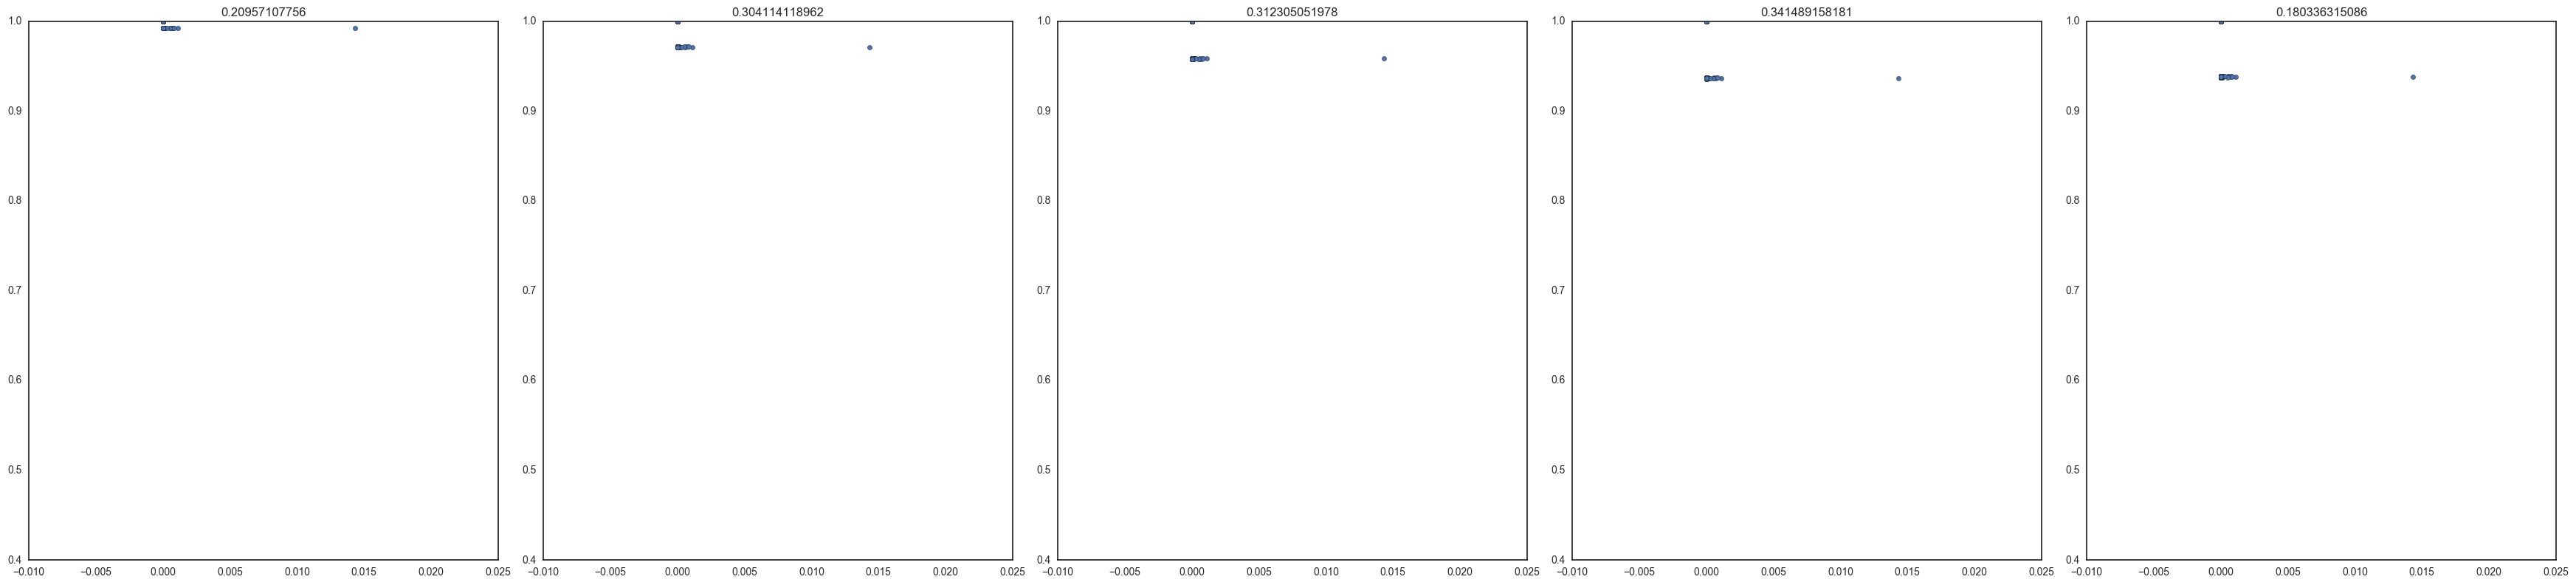

In [34]:
sample = sims
fig=plt.figure(figsize=(35,8))
for i in range(5):
    ax = fig.add_subplot(1,5,i+1)
    plot_2d_hist(sample['gen_b2'],sample['EvtsInBin_bin%d'%i],ax=ax);
    NevtsData = cm_pars['C12'].get_value(i,'EvtsInBin')
    xlim = ax.get_xlim()
    plt.plot([xlim[0],xlim[1]],[20*NevtsData,20*NevtsData],'--')
    ax.set_title(np.average(sample['gen_b2'],weights=sample['ks_local_Pval_pcmZ_bin%d_Al27'%i]))
#     ax.set_ylim(0,evtsgen_PmissBins[i])
print np.average(sample['gen_b2'],weights=sample['ks_local_Pval_pcmX_C12'])
plt.tight_layout()
fig=plt.figure(figsize=(35,8))
for i in range(5):
    ax = fig.add_subplot(1,5,i+1)
    plot_2d_hist(sample['gen_b2'],sample['EvtsInBin_bin%d'%i],weights=sample['ks_local_Pval_pcmZ_bin%d_Al27'%i],ax=ax);
    NevtsData = cm_pars['C12'].get_value(i,'EvtsInBin')
    xlim = ax.get_xlim()
    plt.plot([xlim[0],xlim[1]],[20*NevtsData,20*NevtsData],'--')
    ax.set_title(np.average(sample['gen_b2'],weights=sample['ks_local_Pval_pcmZ_bin%d_Al27'%i]))
#     ax.set_ylim(0,evtsgen_PmissBins[i])
plt.tight_layout()
fig=plt.figure(figsize=(35,8))
for i in range(5):
#     weights=sample['ks_local_Pval_pcmZ_bin%d_C12'%i]
    weights=sample['ks_PvalTotal_Al27']
    ax = fig.add_subplot(1,5,i+1)
    loss = (evtsgen_PmissBins[i]-sample['EvtsInBin_bin%d'%i]).astype(float)/evtsgen_PmissBins[i]
    ax.scatter(weights,loss);
    ax.set_ylim(0.4,1);
#     ax.set_xlim(0,1.e-5)
    ax.set_title(np.average(sample['gen_b2'],weights=sample['ks_local_Pval_pcmZ_bin%d_Al27'%i]))
plt.tight_layout()

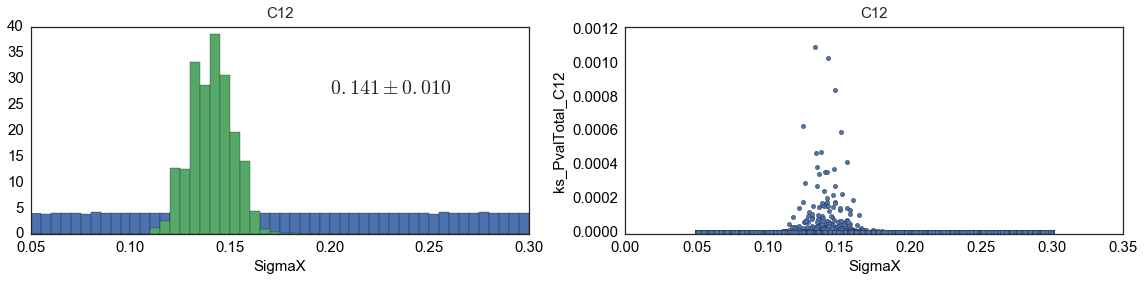

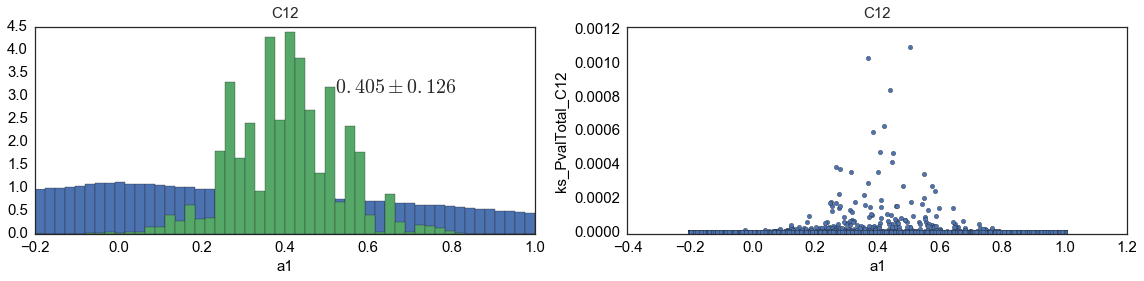

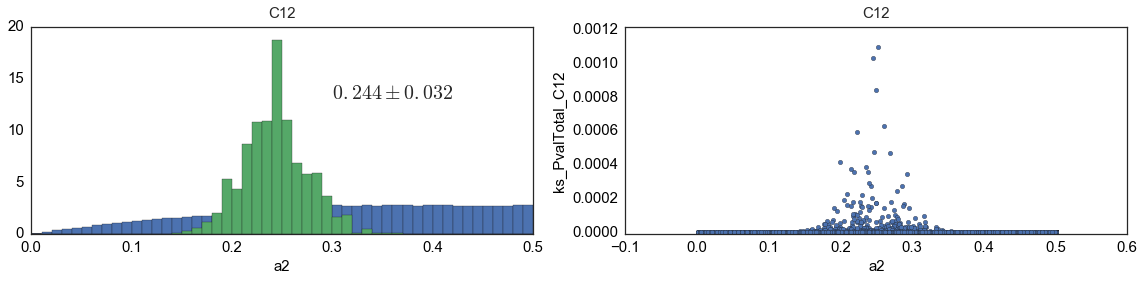

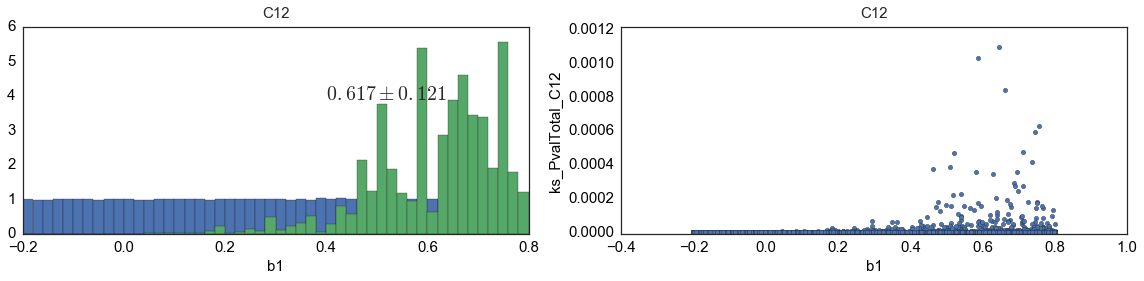

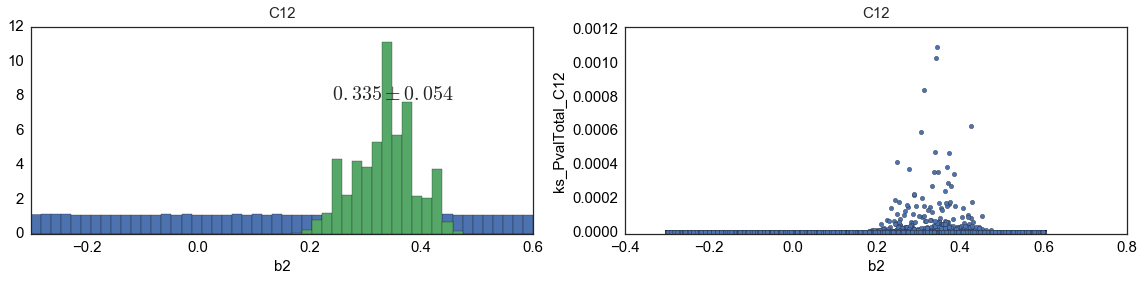

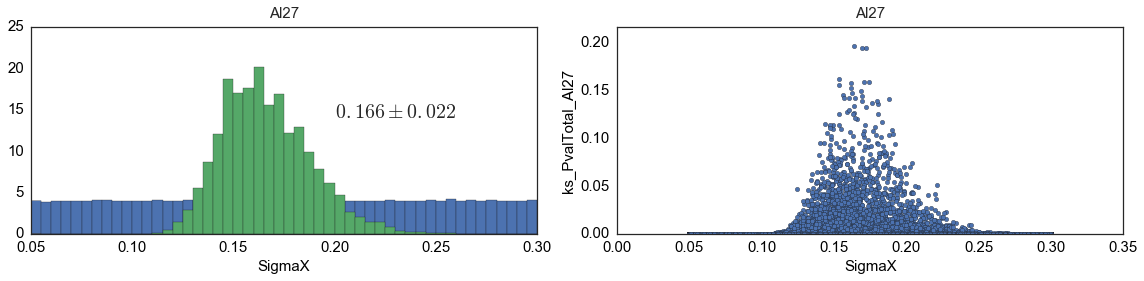

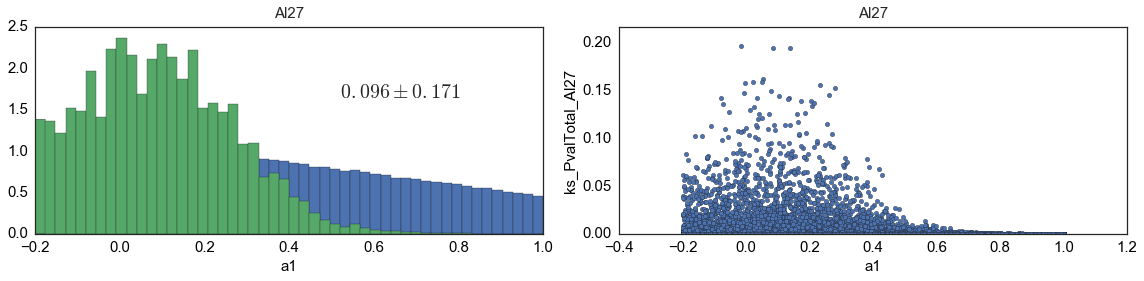

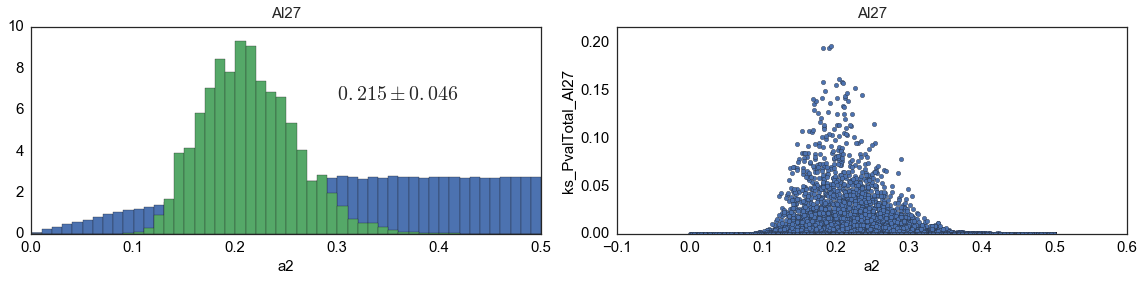

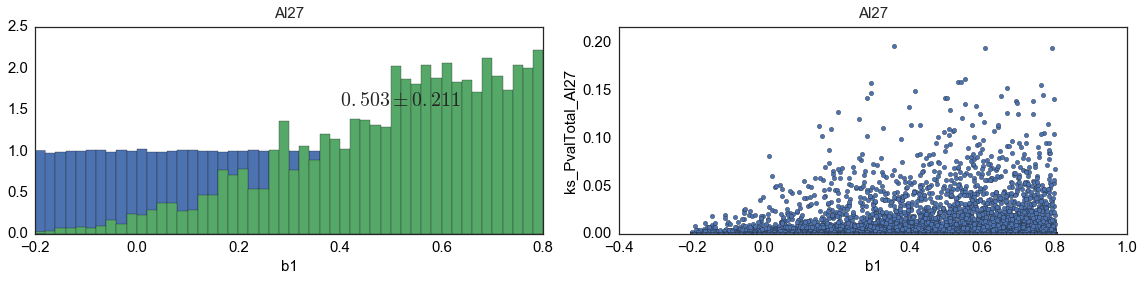

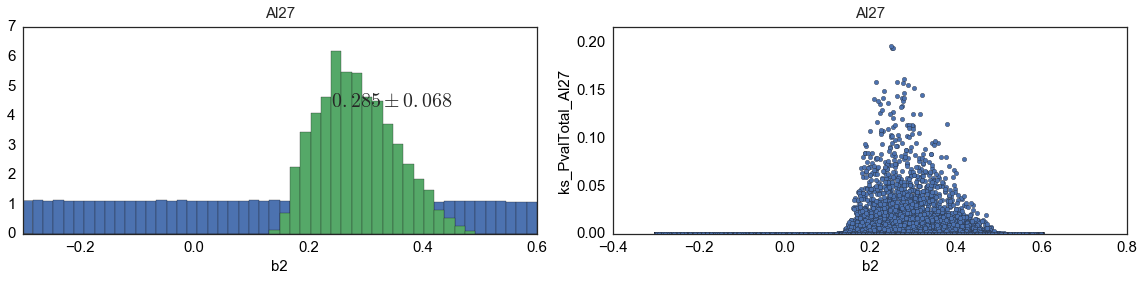

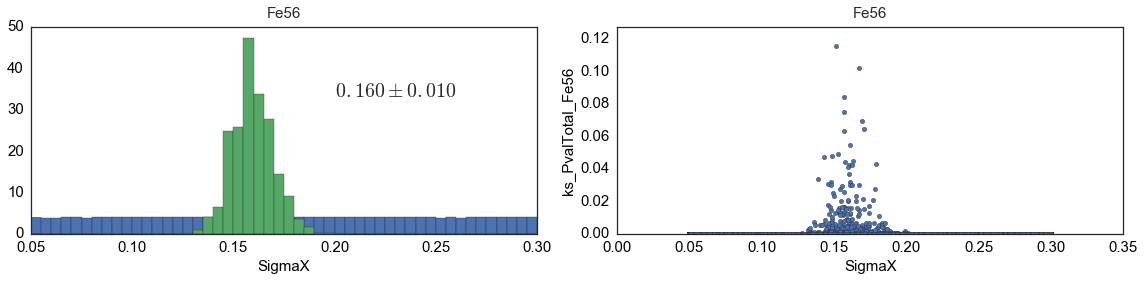

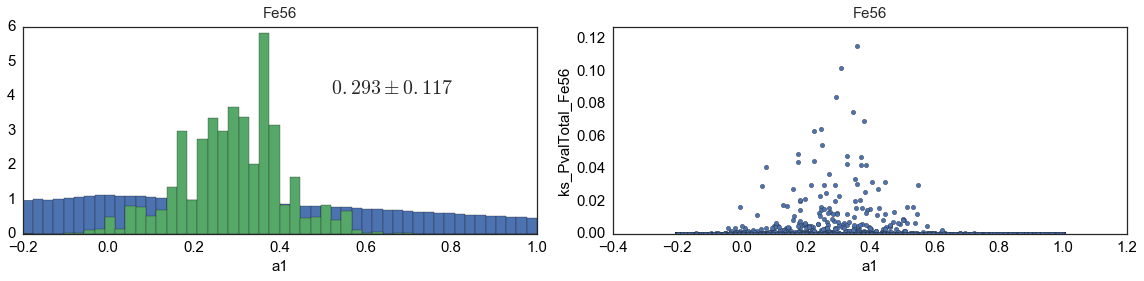

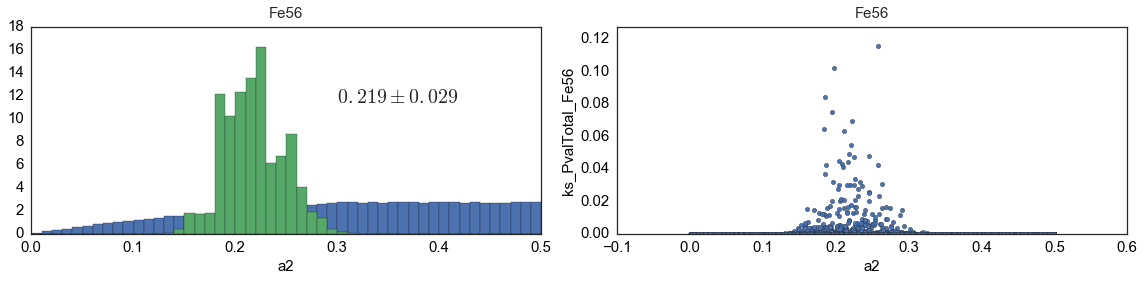

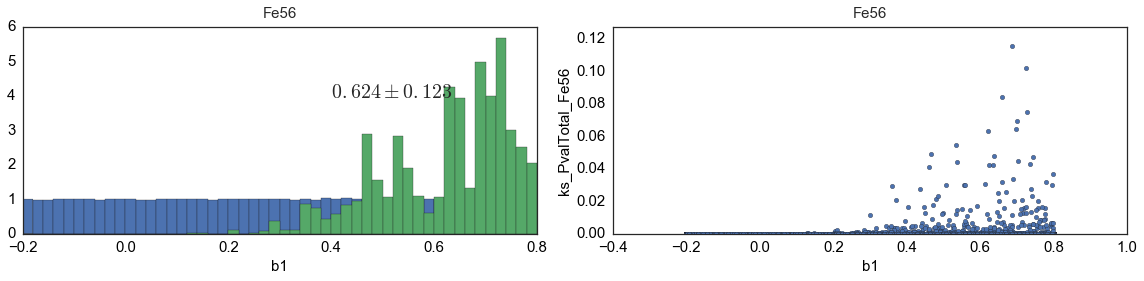

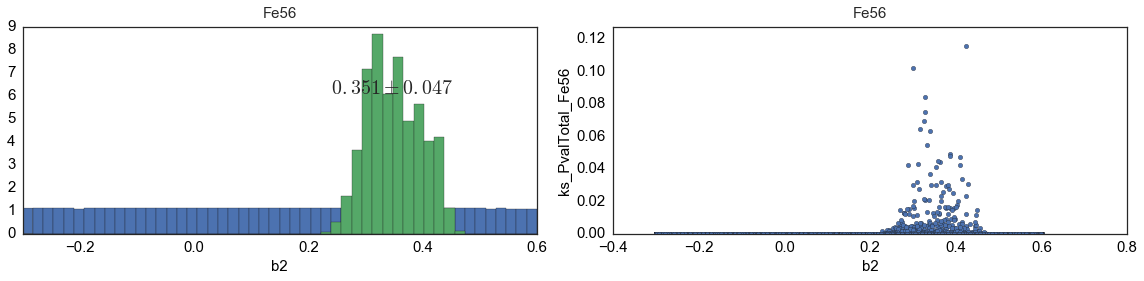

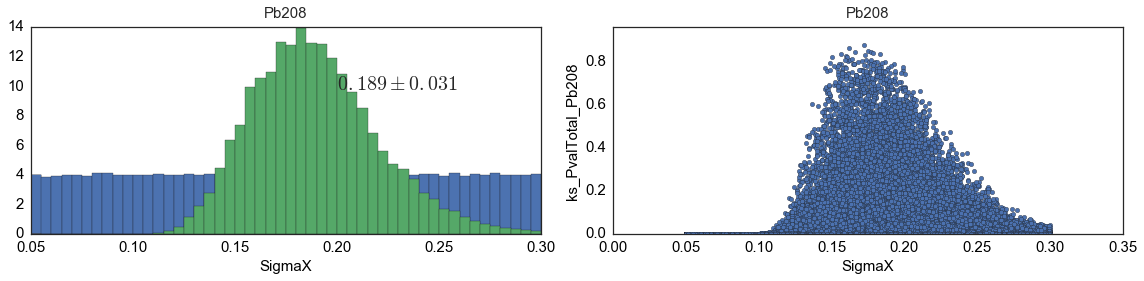

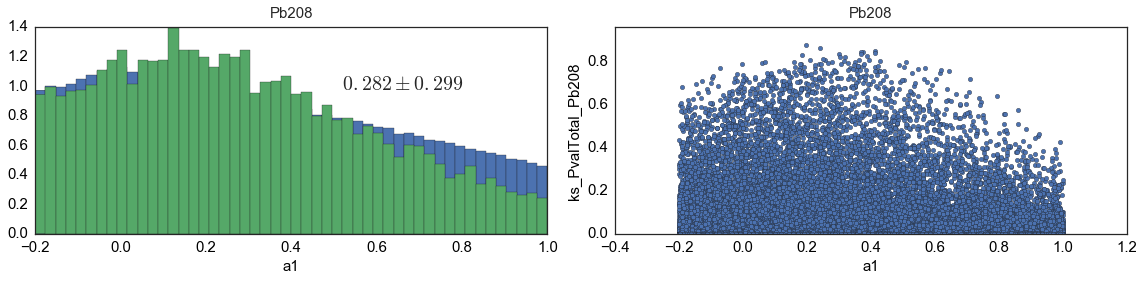

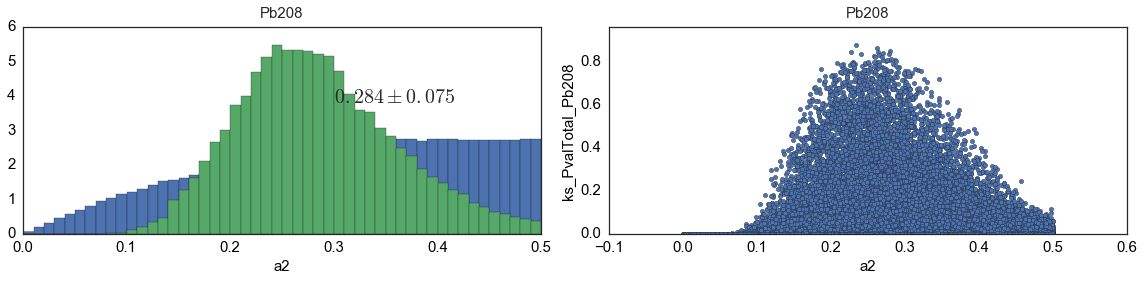

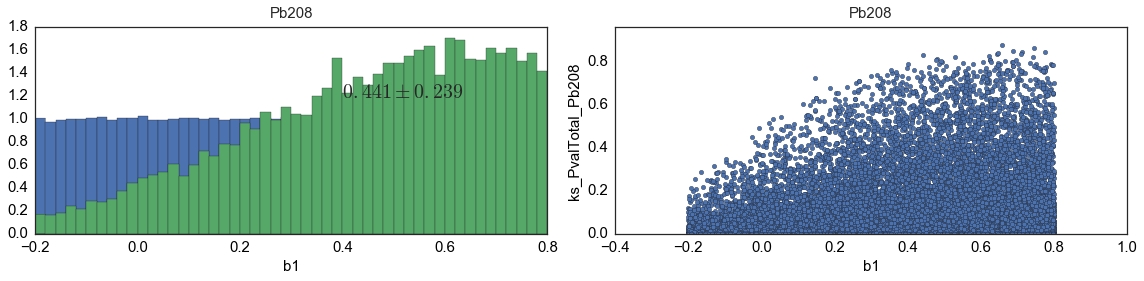

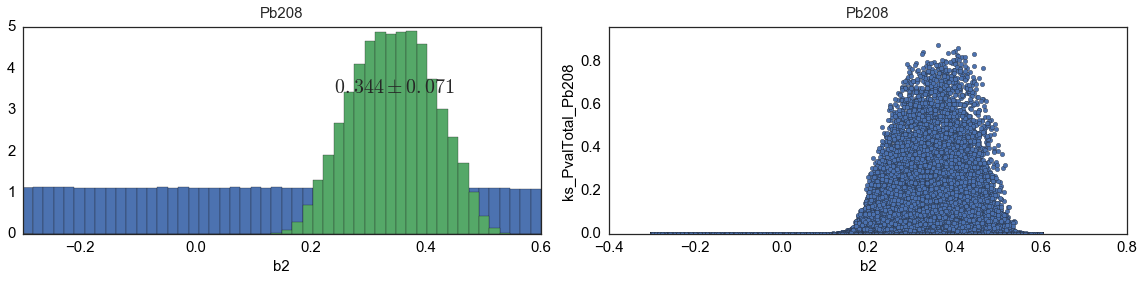

In [5]:
for target in ['C12','Al27','Fe56','Pb208']:
    for parameter in ['SigmaX','a1','a2','b1','b2']:
        var,w = parameter, 'ks_PvalTotal_'+target
        weights = sims[w]
        x = sims['gen_'+var]
        fig = plt.figure(figsize=(16,4))
        ax = fig.add_subplot(1,2,1)
        h,bins,_=plt.hist(x,bins=50,normed=1);
        if np.sum(weights)>0:
            h,bins,_=plt.hist(x,weights=weights,bins=bins,normed=1);            
            mu = np.average(sims['gen_'+var] , weights=weights)
            sigma = np.sqrt(np.average((sims['gen_'+var]-mu)**2, weights=weights))                                                                           
        set_axes(ax,x_label=var,fontsize=15)
        ax.set_title(target,fontsize=15,y=1.02)
        plt.text(np.min(bins)+0.6*(np.max(bins)-np.min(bins)),0.7*np.max(h),'$%.3f\\pm%.3f$'%(mu,sigma),fontsize=20)
        ax = fig.add_subplot(1,2,2)
        ax.set_title(target,fontsize=15,y=1.02)
        plt.scatter(x,weights);
        set_axes(ax,x_label=var,y_label=w,fontsize=15)
        ax.set_ylim(np.min(weights)-0.00001,1.1*np.max(weights)+0.00001)
        plt.tight_layout()

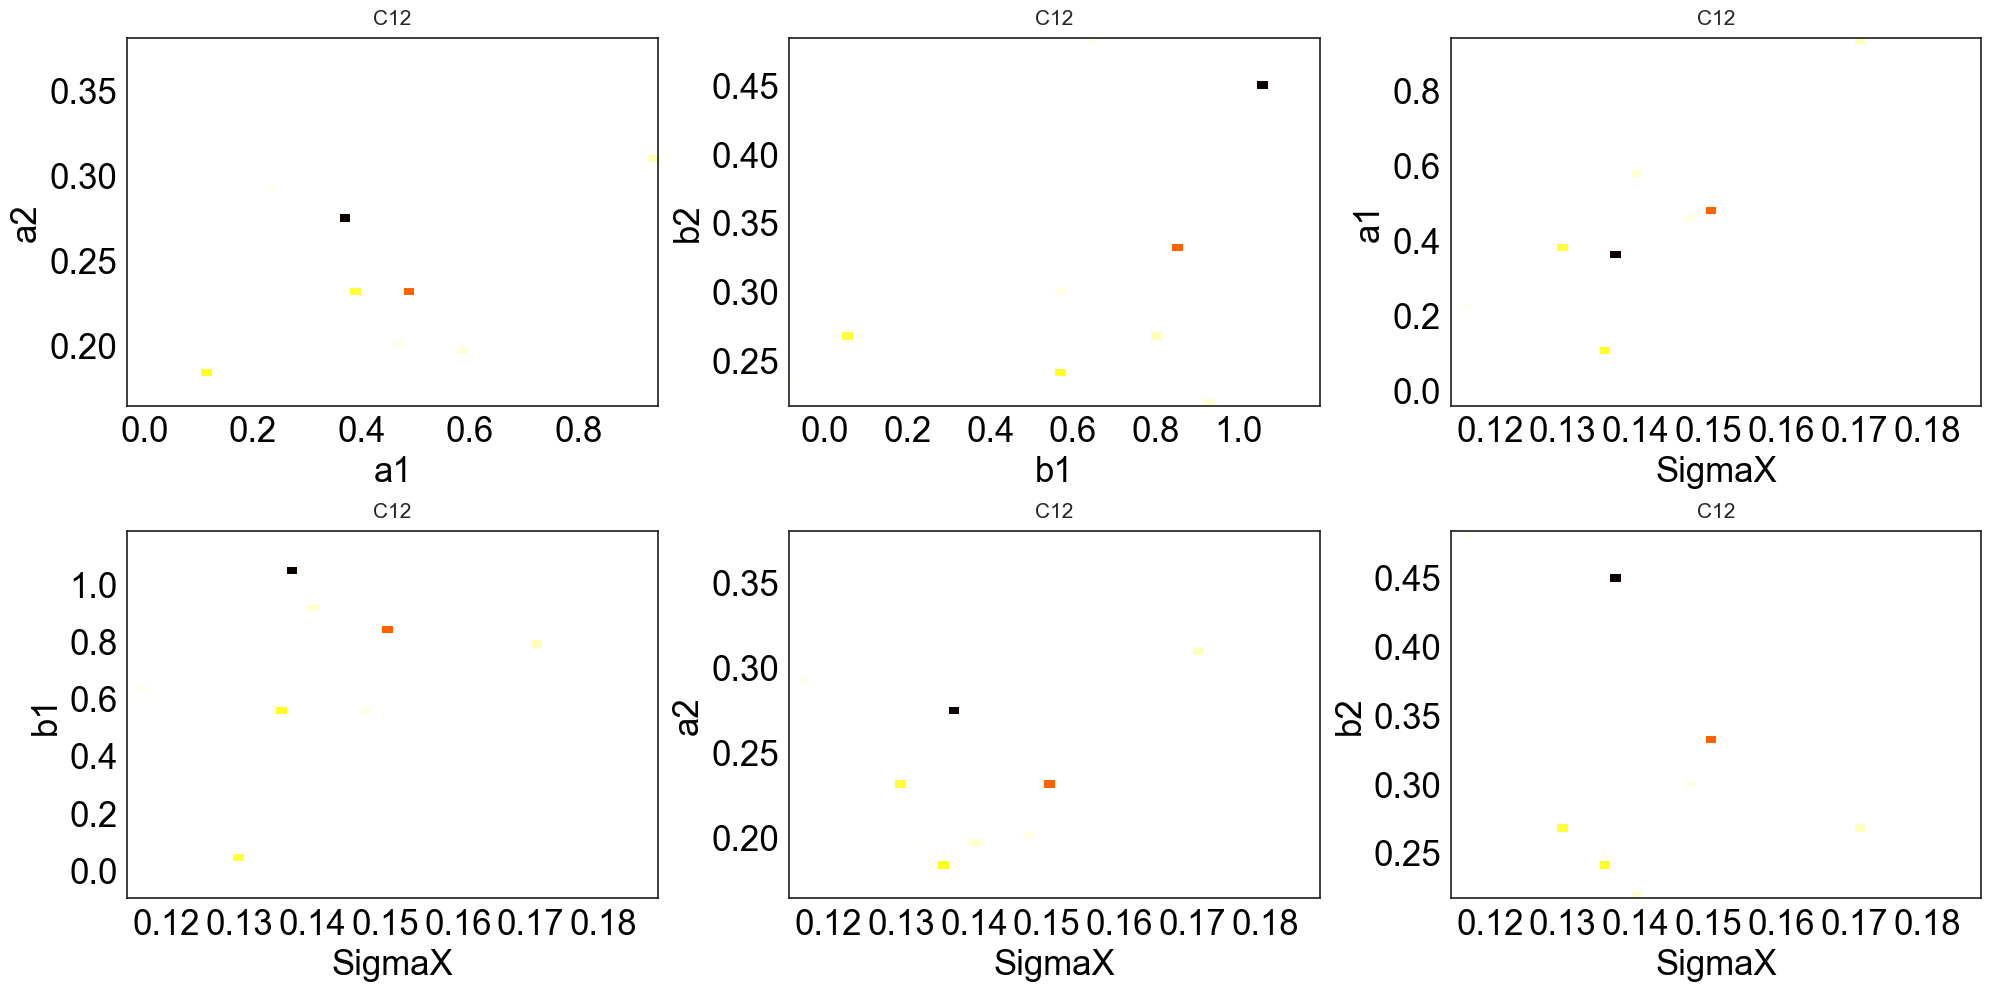

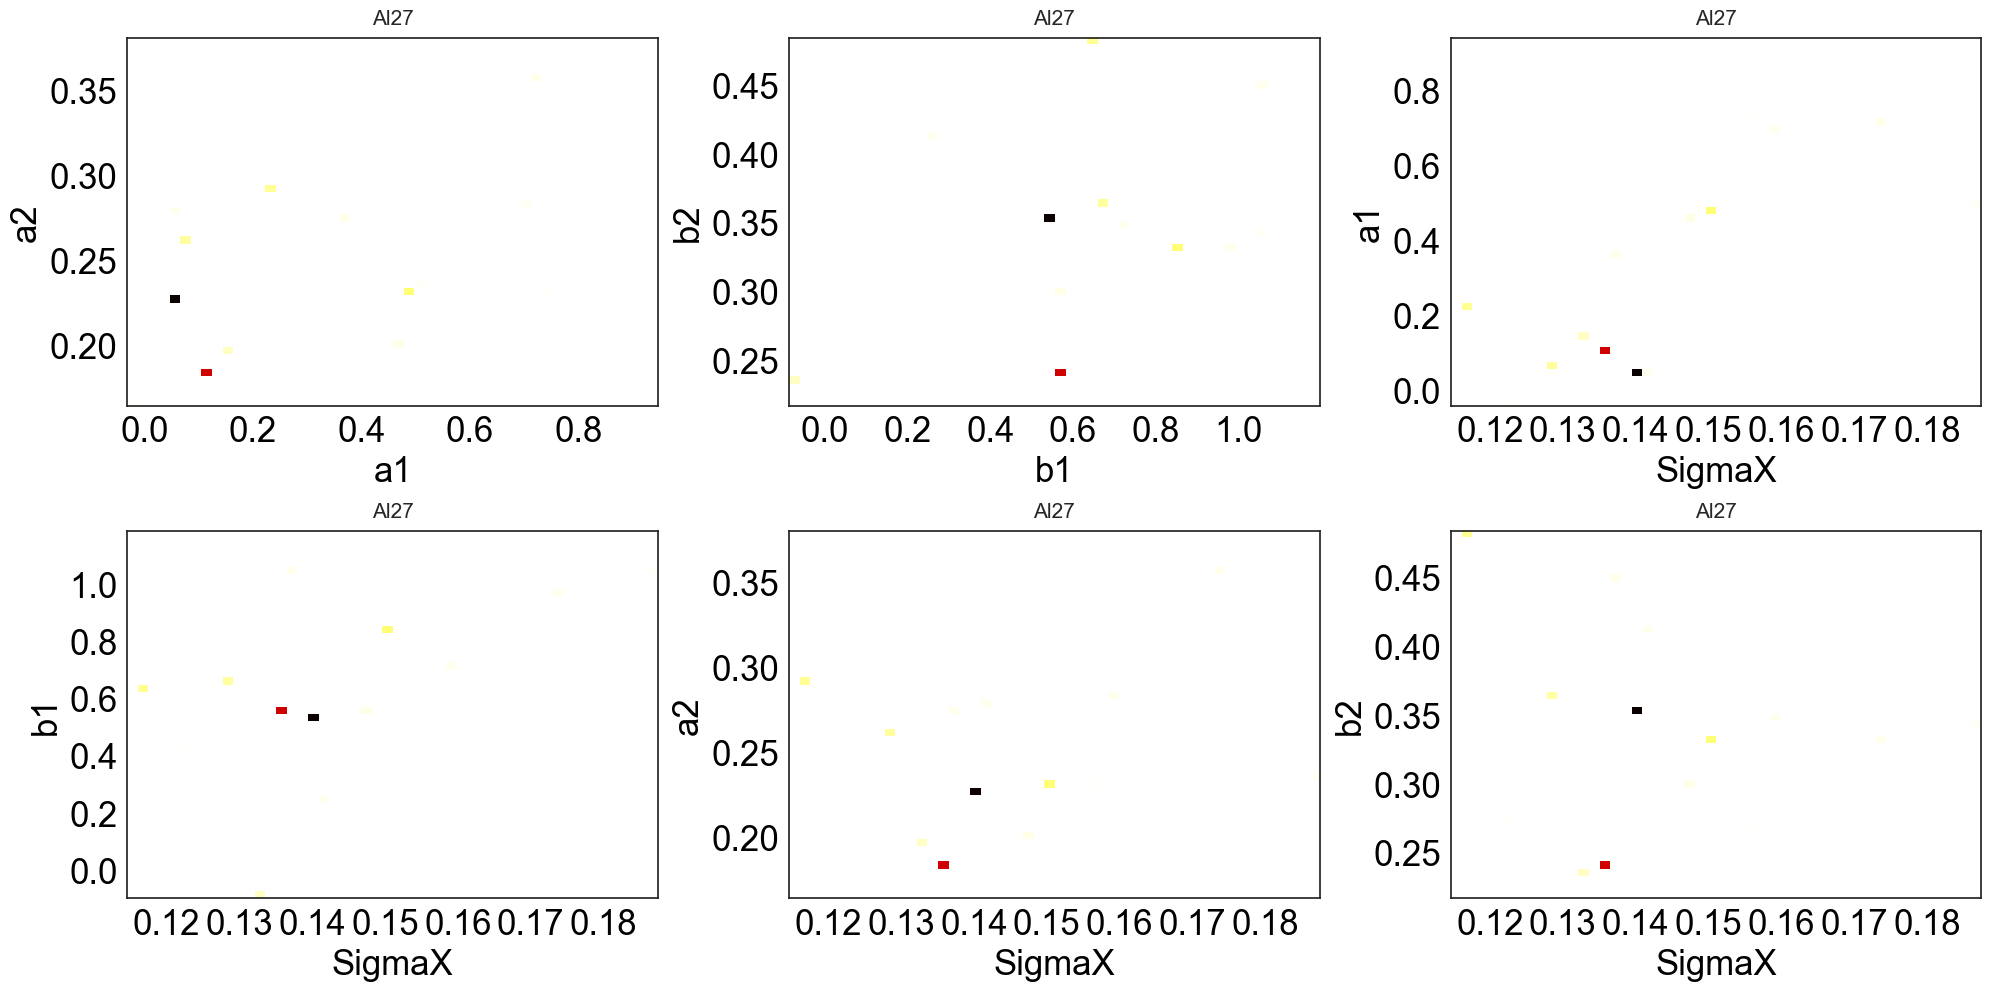

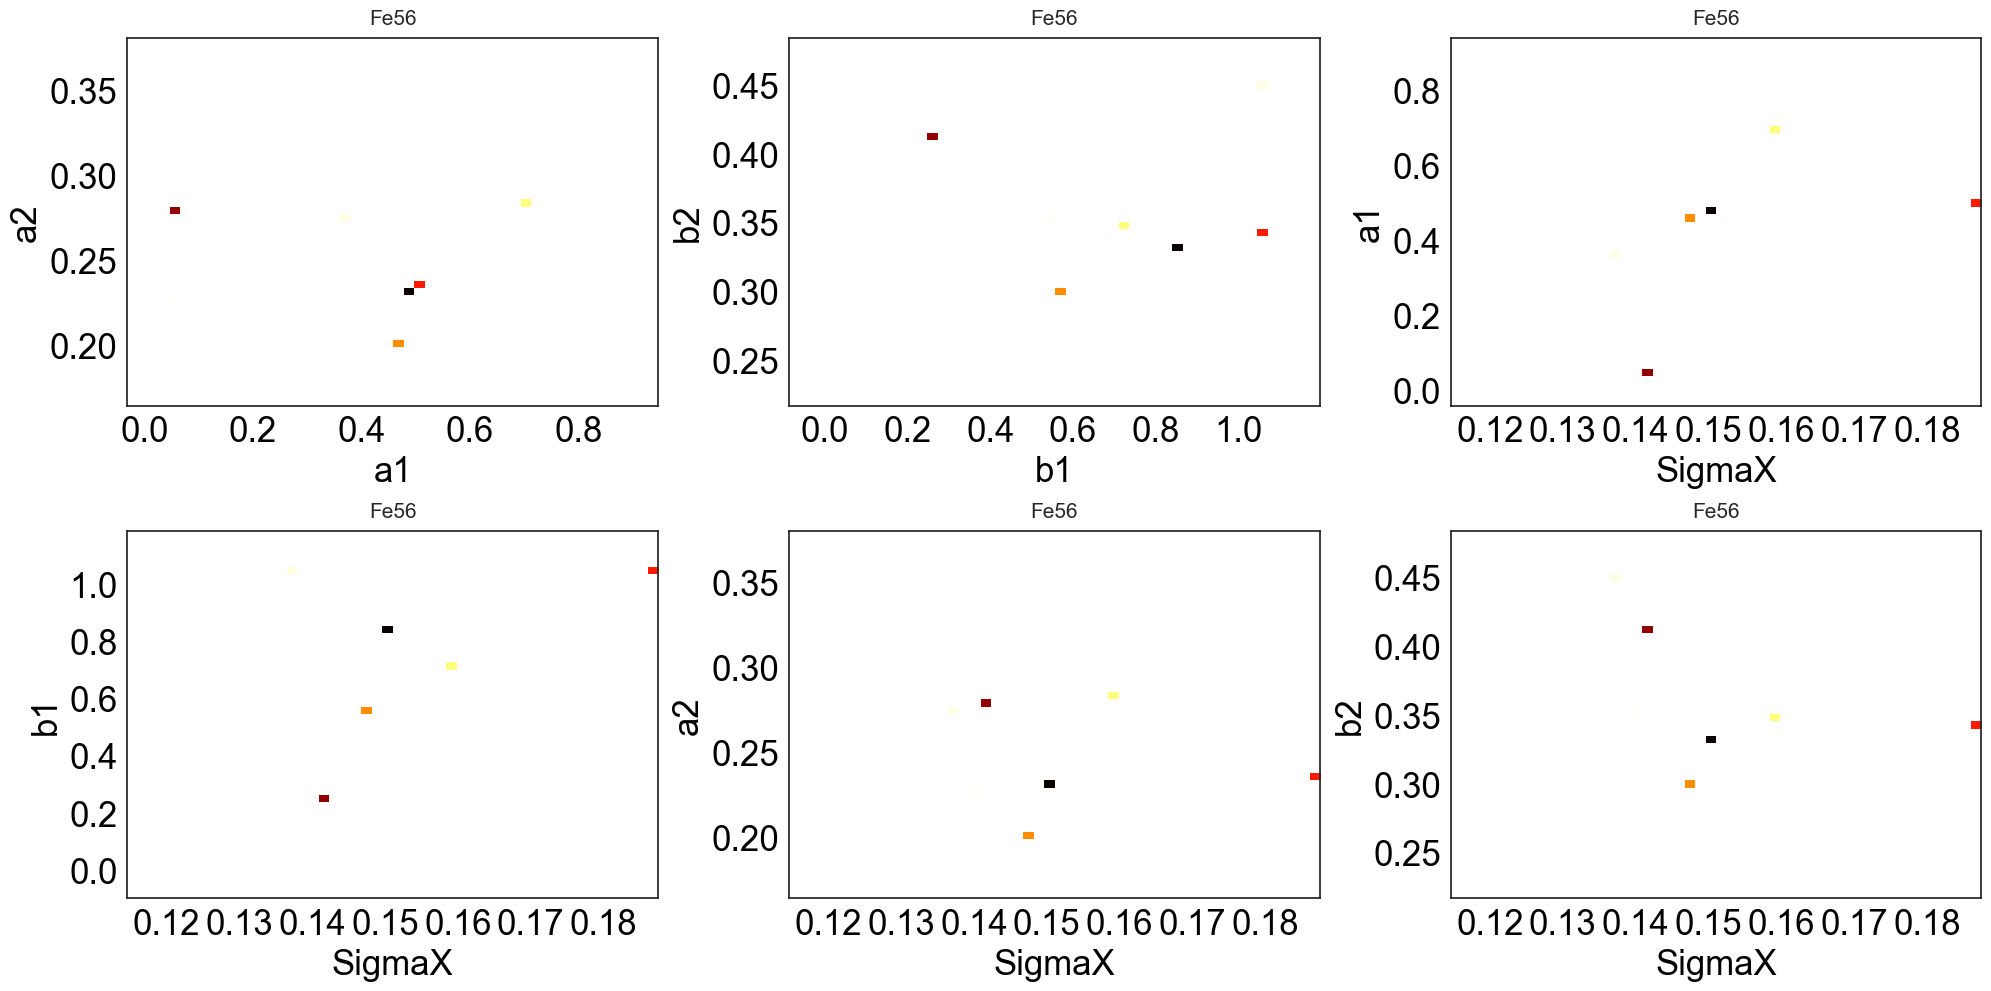

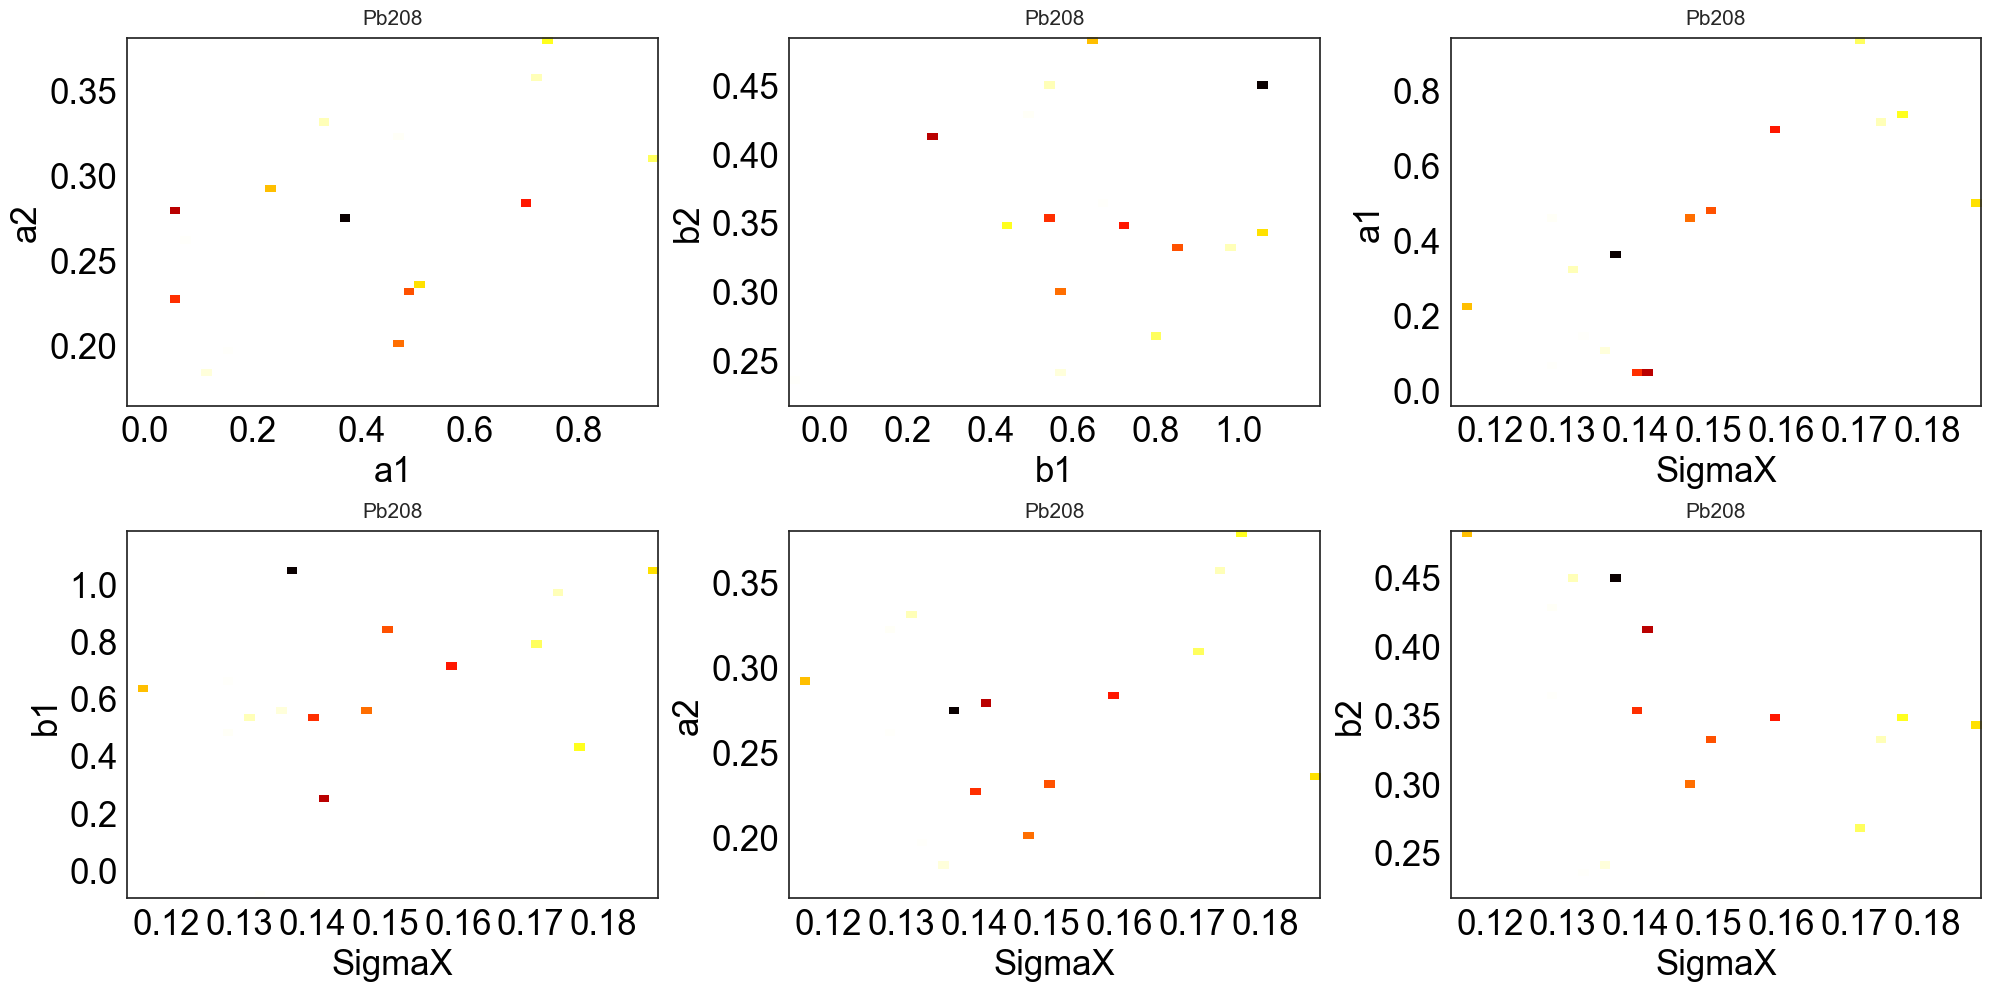

In [158]:
norm=''
for target in ['C12','Al27','Fe56','Pb208']:

    fig=plt.figure(figsize=(20,10))
    for i,parx,pary in zip(range(6),
                           ['a1','b1','SigmaX','SigmaX','SigmaX','SigmaX'],                         
                           ['a2','b2','a1','b1','a2','b2']):
        ax = fig.add_subplot(2,3,i+1)
        varx,vary,w = parx,pary, 'ks_PvalTotal_'+target
        plot_2d_hist(sample['gen_'+varx],sample['gen_'+vary],weights=sample[w],xlabel=parx,ylabel=pary,ax=ax,norm=norm)
        ax.set_title(target,fontsize=15,y=1.02)
        plt.tight_layout()

-0.019590078895719121


variable "sims" not defined.

variable "sims.ks_PvalTotal_Al)" not defined.


-0.0170418665306


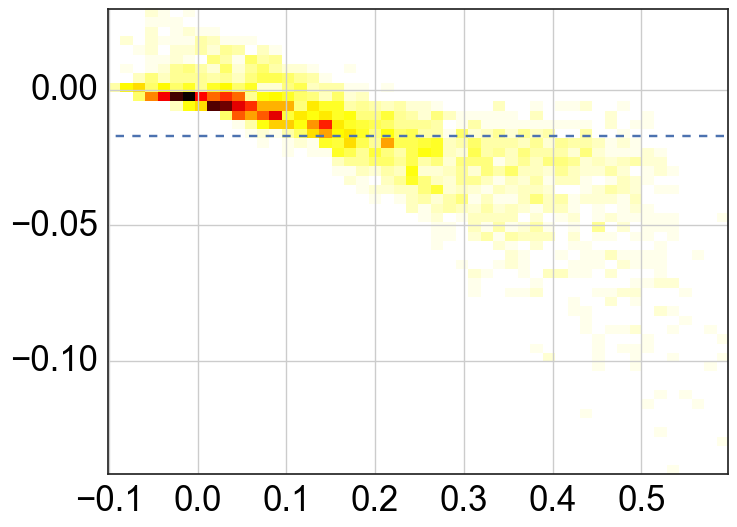

In [157]:
fig,ax=plt.subplots(figsize=(8,6))
weights=None#sims.ks_local_Pval_pcmZ_bin2_C12 #
plot_2d_hist( sims.rec_b2 , sims.gen_SigmaX - sims.recSigmaX  ,  ax=ax , weights=weights);
average = np.average( sims.gen_SigmaX - sims.recSigmaX  , weights=weights)
print average
plt.plot([-1,1],[average,average],'--')
ax.grid()

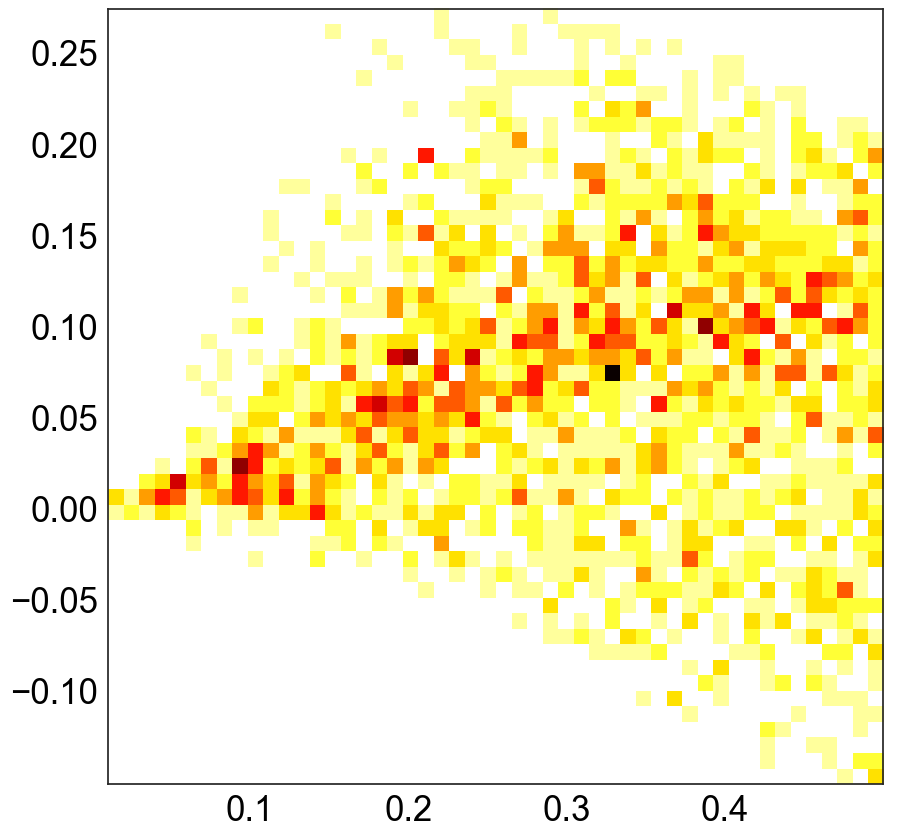

In [160]:
plot_2d_hist( sims.gen_a2 , sims.gen_b2 - sims.rec_b2  , weights=None);

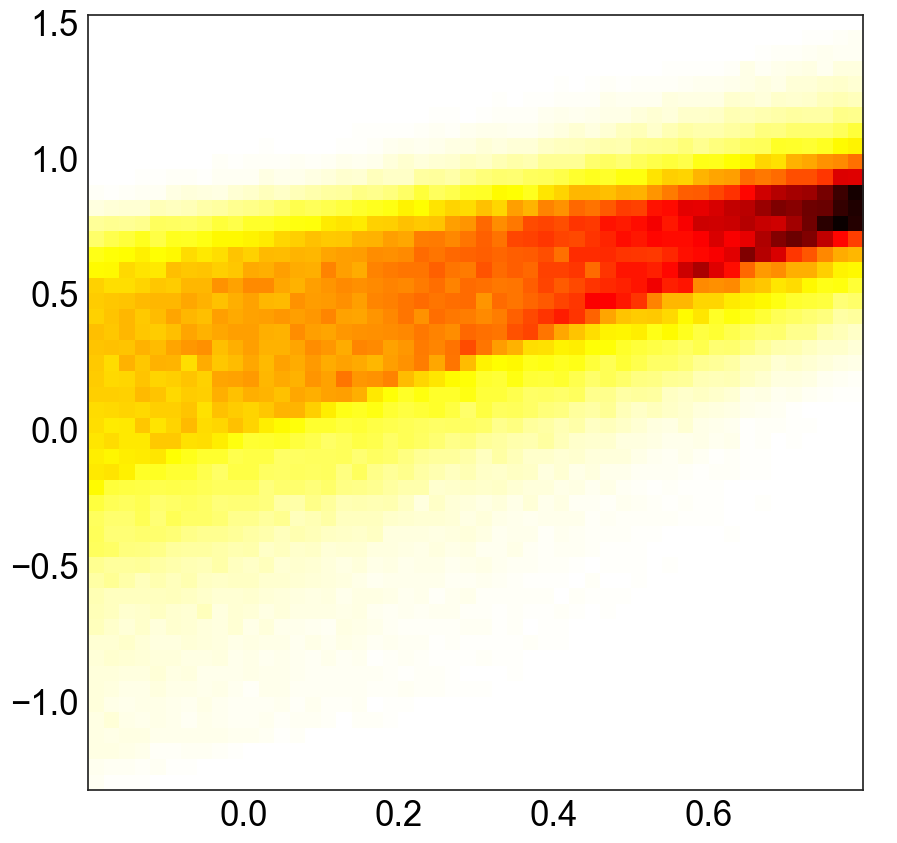

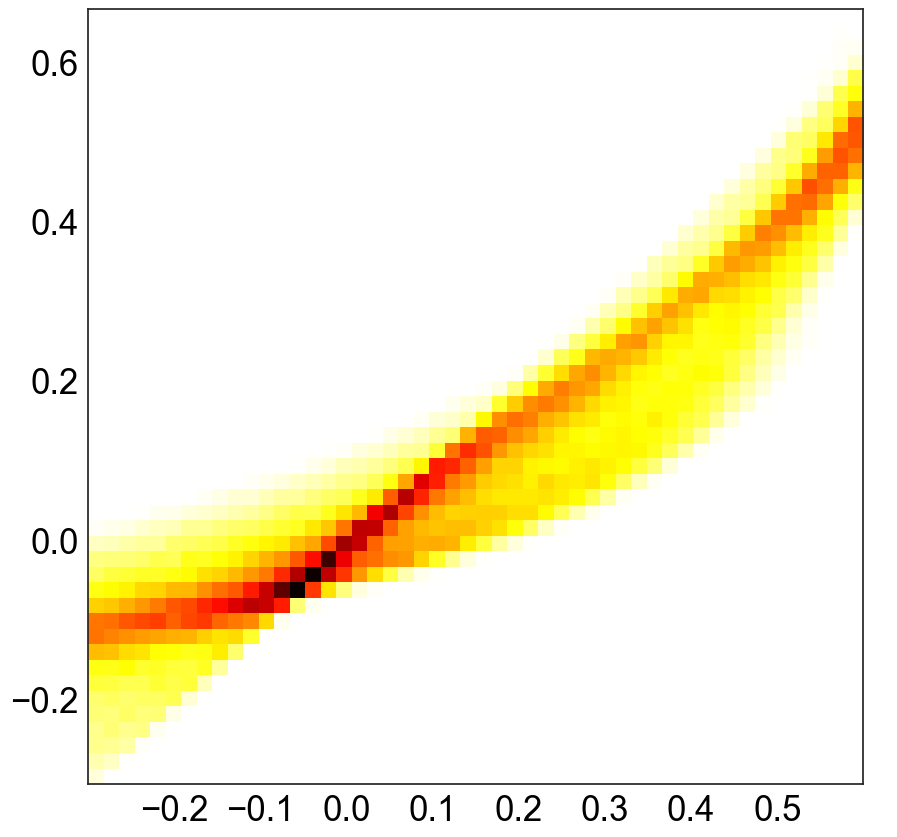

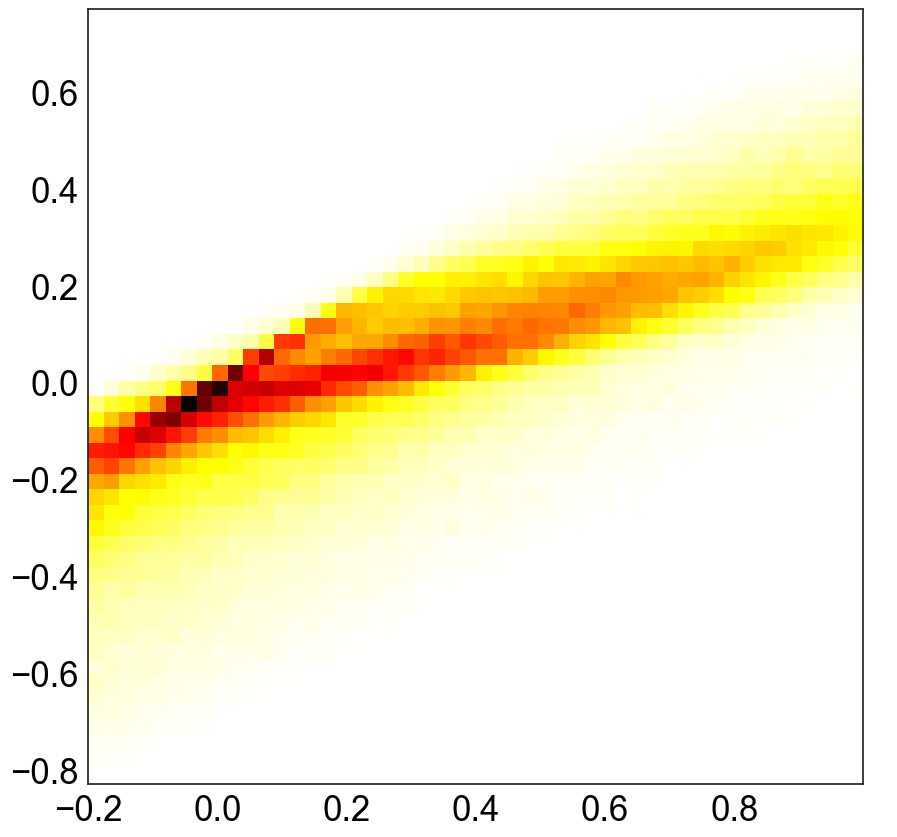

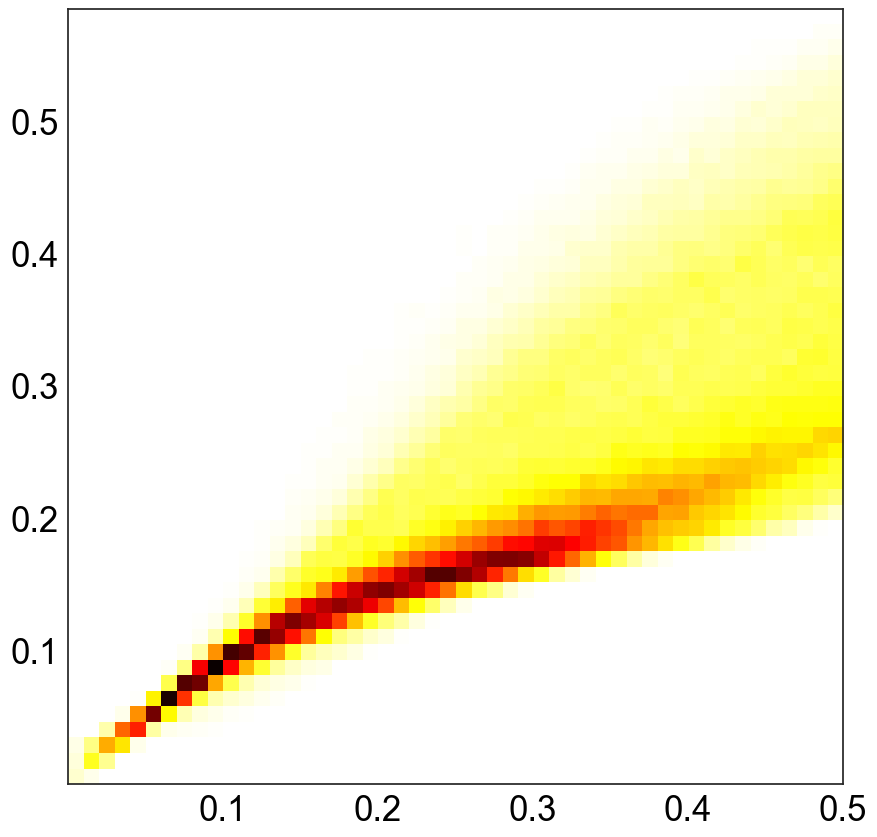

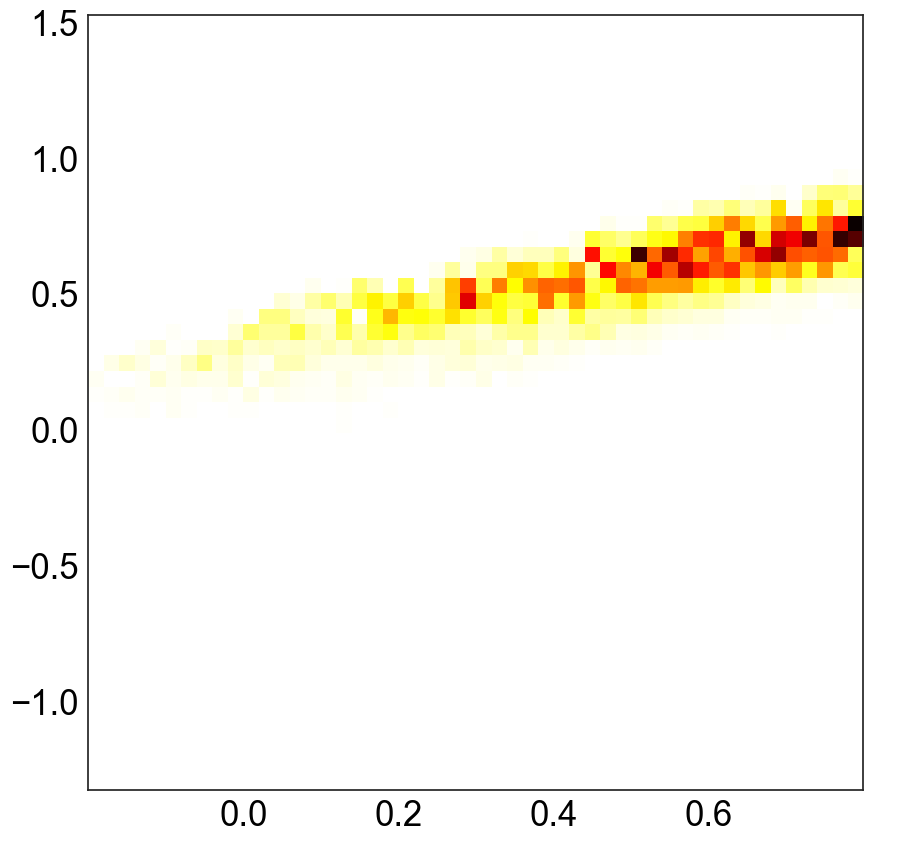

In [61]:
plot_2d_hist(sims[sims['rec_b1']>-100].gen_b1,sims[sims['rec_b1']>-100].rec_b1, norm='');
plot_2d_hist(sims[sims['rec_b2']>-100].gen_b2,sims[sims['rec_b2']>-100].rec_b2, norm='');
plot_2d_hist(sims[sims['rec_a1']>-100].gen_a1,sims[sims['rec_a1']>-100].rec_a1, norm='');
plot_2d_hist(sims[sims['rec_a2']>-100].gen_a2,sims[sims['rec_a2']>-100].rec_a2, norm='');
plot_2d_hist(sims[sims['rec_b1']>-100].gen_b1,sims[sims['rec_b1']>-100].rec_b1,weights=sims[sims['rec_b1']>-100].ks_PvalTotal_Al27, norm='');

[0.0, 0.99758600000000008]


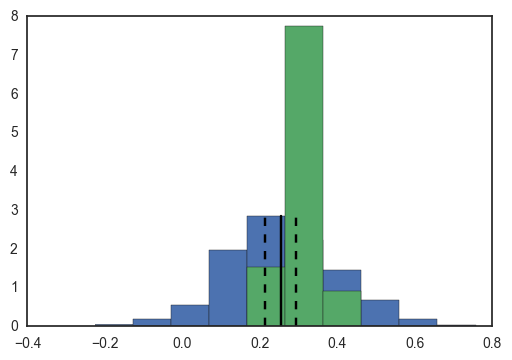

In [99]:
target,i_bin = 'Al27',4
# h,_,_=plt.hist(sims['recmean_z_pmiss_0.750_1.000'])
h,bins,_=plt.hist(sims['recmean_z_bin%d'%i_bin],normed=1)
plt.hist(sims['recmean_z_bin%d'%i_bin],weights=sims['ks_PvalTot_allPvals_'+target],bins=bins,normed=1)
# 12C mean of the distribution in this bin:
dataCMparameters = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/DATA/'+target+'_dataCMparameters.csv')
par, parErr = dataCMparameters.get_value(i_bin,'mean_z_unweighted'), dataCMparameters.get_value(i_bin,'mean_zErr_unweighted')
x = sims['ks_local_Pval_pcmZ_bin%d_%s'%(i_bin,target)]
print [np.min(x), np.max(x)]
plt.plot([par,par],[0,np.max(h)],color='black');
plt.plot([par+parErr,par+parErr],[0,np.max(h)],'--',color='black');
plt.plot([par-parErr,par-parErr],[0,np.max(h)],'--',color='black');